# CPSC 597 Project
# Predicting Future Prices of Ethereum with LSTM

## Created by John Tu
## Advisor: Dr. Rong Jin
## Reviewer: Dr. Kanika Sood

### Based on the following examples from the tutorials: 
### https://www.kaggle.com/code/meetnagadia/bitcoin-price-prediction-using-lstm
### https://www.analyticsvidhya.com/blog/2021/05/bitcoin-price-prediction-using-recurrent-neural-networks-and-lstm/

# Data Preparation

In [1]:
# Be sure to use drive to access Google Drive files.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Using pandas, import the csv file and display the first 15 rows original dataset.
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ETH-USD.csv')
dataset.head(15)

Date        Open        High         Low       Close   Adj Close  \
0   2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1   2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2   2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3   2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4   2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
5   2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   
6   2017-11-15  337.963989  340.911987  329.812988  333.356995  333.356995   
7   2017-11-16  333.442993  336.158997  323.605988  330.924011  330.924011   
8   2017-11-17  330.166992  334.963989  327.523010  332.394012  332.394012   
9   2017-11-18  331.980011  349.615997  327.687012  347.612000  347.612000   
10  2017-11-19  347.401001  371.290985  344.739990  354.385986  354.385986   
11  2017-11-20  354.093994  372.136993  353.289001  366.730011  366.730011   
12  2017-11-21  367.442993  372.470001  350.692993  360.401001  360.401001   
13  2017-11-22  360.312012  381.420013  360.147003  380.652008  380.652008   
14  2017-11-23  381.438995  425.548004  376.088013  410.165985  410.165985   

        Volume  
0    893249984  
1    885985984  
2    842300992  
3   1613479936  
4   1041889984  
5   1069680000  
6    722665984  
7    797254016  
8    621732992  
9    649638976  
10  1181529984  
11   807027008  
12   949912000  
13   800819008  
14  1845680000

In [3]:
# Now inspect the last 15 rows of the dataset.
dataset.tail(15)

Date         Open         High          Low        Close  \
1978  2023-04-10  1859.741211  1917.300171  1848.164185  1911.207520   
1979  2023-04-11  1911.375854  1936.728271  1886.534180  1892.189697   
1980  2023-04-12  1891.949707  1929.881226  1860.036865  1920.682129   
1981  2023-04-13  1917.698364  2022.150146  1901.860352  2012.634644   
1982  2023-04-14  2013.930664  2126.316650  2011.503296  2101.635498   
1983  2023-04-15  2101.616455  2111.075439  2076.510742  2092.466797   
1984  2023-04-16  2092.281006  2137.445068  2076.832031  2120.005859   
1985  2023-04-17  2120.001221  2120.113525  2063.038574  2076.242920   
1986  2023-04-18  2075.855225  2121.531494  2057.653809  2104.537354   
1987  2023-04-19  2103.946289  2104.857178  1928.582886  1936.403442   
1988  2023-04-20  1936.417969  1979.573364  1918.132813  1943.097656   
1989  2023-04-21  1943.409912  1955.649170  1827.788940  1849.999878   
1990  2023-04-22  1849.286499  1886.781616  1845.849243  1874.228638   
1991  2023-04-23  1874.171509  1882.229736  1838.992432  1862.062012   
1992  2023-04-24  1862.014648  1888.193726  1815.724609  1833.186401   

        Adj Close       Volume  
1978  1911.207520   8380134275  
1979  1892.189697   8877222956  
1980  1920.682129  11010714187  
1981  2012.634644  12546950499  
1982  2101.635498  16298099411  
1983  2092.466797   8036468153  
1984  2120.005859   7898126856  
1985  2076.242920   9648882546  
1986  2104.537354   9134015143  
1987  1936.403442  13779745451  
1988  1943.097656  11324135406  
1989  1849.999878  12044274581  
1990  1874.228638   6970642726  
1991  1862.062012   6607451862  
1992  1833.186401   8498483200

In [4]:
dataset.isna().sum() # Check how many missing values are there in the dataset.

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
dataset.isna().any() # Verify if there are any missing values in the dataset.

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

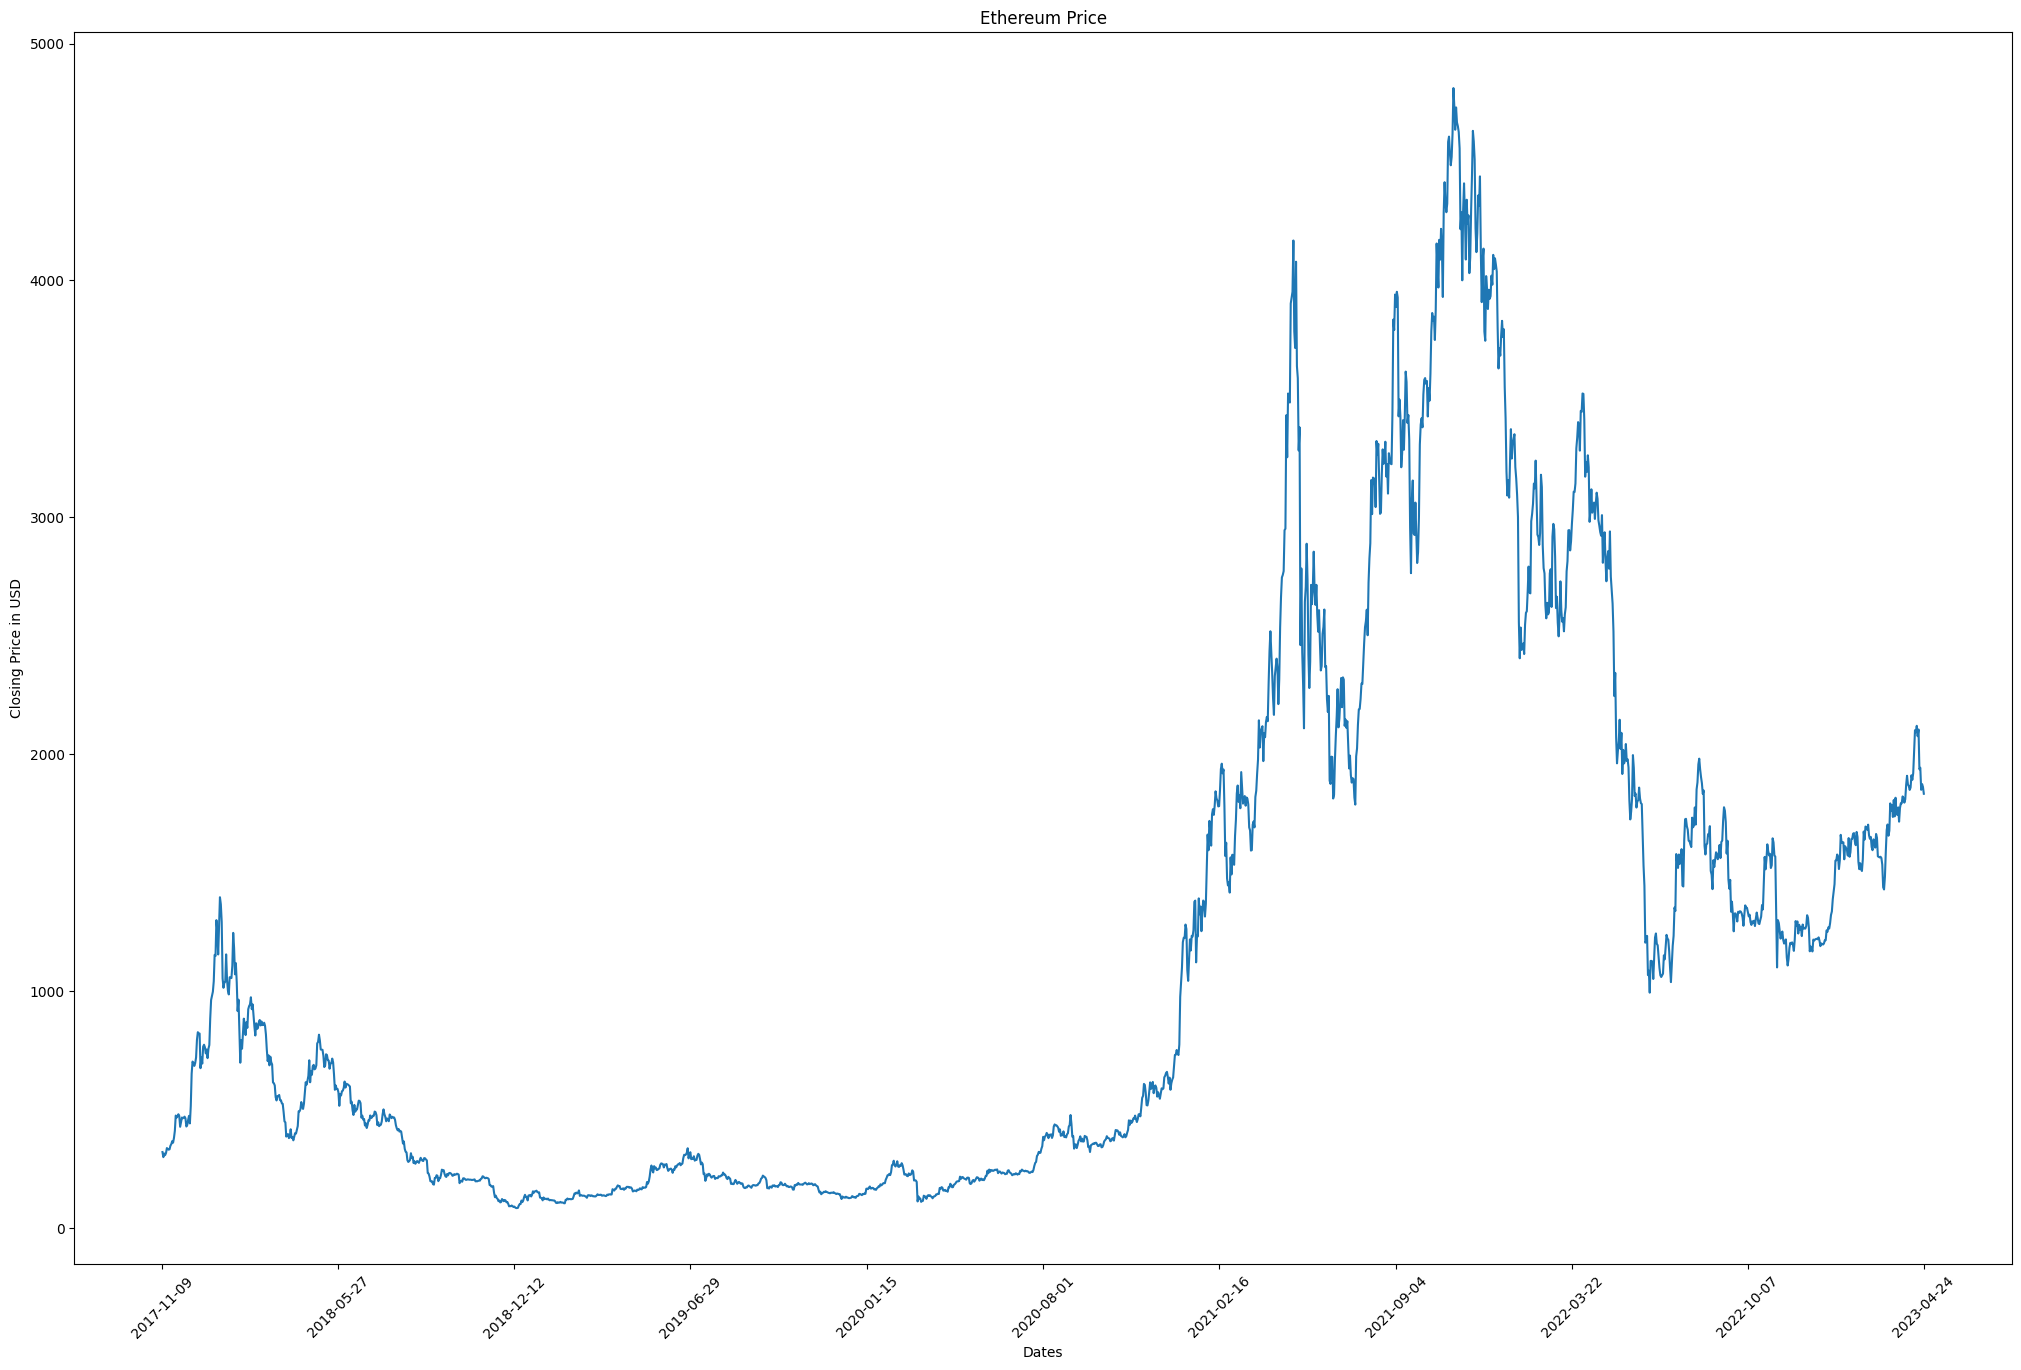

In [6]:
# Plot the graph of the Ethereum price list.
from matplotlib import pyplot as plt

# Manually specify the x-ticks and labels of the pyplot. Consider dividing the plot into 11 sections.
# Except the first and last x-tick, multiply by 0.1 each and add up 0.1 for every subsequent x-tick
# until the x-tick before the very last one. Be sure to convert into integer or else an error will be thrown.
date_xtick = [0, int(len(dataset)*0.1), int(len(dataset)*0.2), int(len(dataset)*0.3), int(len(dataset)*0.4), int(len(dataset)*0.5),
              int(len(dataset)*0.6), int(len(dataset)*0.7), int(len(dataset)*0.8), int(len(dataset)*0.9), int(len(dataset)-1)]
date_label = [dataset['Date'].iloc[0], dataset['Date'].iloc[int(len(dataset)*0.1)], dataset['Date'].iloc[int(len(dataset)*0.2)],
              dataset['Date'].iloc[int(len(dataset)*0.3)], dataset['Date'].iloc[int(len(dataset)*0.4)], dataset['Date'].iloc[int(len(dataset)*0.5)],
              dataset['Date'].iloc[int(len(dataset)*0.6)], dataset['Date'].iloc[int(len(dataset)*0.7)], dataset['Date'].iloc[int(len(dataset)*0.8)],
              dataset['Date'].iloc[int(len(dataset)*0.9)], dataset['Date'].iloc[int(len(dataset)-1)]] # Manually set up the dates for the x-axis.
plt.figure(figsize=(25, 16)) # Make the plot appear larger for better clarity.
plt.plot(dataset['Close'])
plt.xticks(date_xtick, date_label, rotation=45)
plt.title("Ethereum Price")
plt.xlabel("Dates")
plt.ylabel("Closing Price in USD")
plt.show()

In [7]:
# Save the original data columns for later use.
#original_data = dataset[['Date', 'Open']]
#original_data = dataset[['Date', 'High']]
#original_data = dataset[['Date', 'Low']]
original_data = dataset[['Date', 'Close']]
print("Shape of original data: {}".format(original_data.shape))

Shape of original data: (1993, 2)


In [8]:
# Be sure to import skicit and numpy as they will be needed for data preparation.
from sklearn import *
import numpy as np

In [9]:
# Choose which column to focus on for price prediction.
#column_data = dataset['Open']
#column_data = dataset['High']
#column_data = dataset['Low']
column_data = dataset['Close']

In [10]:
# Select the number of time steps to perform when creating the features and labels
# from the training and test sets.
num_steps = 30
# num_steps = 60
# num_steps = 90
# num_steps = 180

In [11]:
def prepare_dataset(data, input_date):
  # Divide the dataset into training and test sets based on the specified date.
  training_data = data.loc[(data['Date'] < input_date)]
  test_data = data.loc[(data['Date'] >= input_date)]

  print("Shape of training and test data: {} and {}".format(training_data.shape, test_data.shape))

  return training_data, test_data

In [12]:
training_data, test_data = prepare_dataset(original_data, "2022-04-01")
training_data = training_data.drop(['Date'], axis=1)
test_data = test_data.drop(['Date'], axis=1)

Shape of training and test data: (1604, 2) and (389, 2)


In [13]:
# Now normalize the training and test data.
normalizer = preprocessing.MinMaxScaler()
training_normalized = normalizer.fit_transform(np.array(training_data).reshape(-1, 1))
test_normalized = normalizer.fit_transform(np.array(test_data).reshape(-1, 1)) 

In [14]:
print(training_data)

            Close
0      320.884003
1      299.252991
2      314.681000
3      307.907990
4      316.716003
...           ...
1599  3291.577637
1600  3336.634521
1601  3401.987793
1602  3385.157959
1603  3281.642822

[1604 rows x 1 columns]


In [15]:
# Split the training and test datasets into features and labels.
# Features will be the input for the neural network model, and examples can be
# date and opening price. Labels will be the output, like predicting the future
# closing price.
feature_training, feature_test, label_training, label_test = [], [], [], []

In [16]:
# This function assigns the features and labels from the training and test datasets.
def data_to_features_and_labels(train, train_len, test, test_len, time_steps=1):
  x_train, x_test, y_train, y_test = [], [], [], []
  for i in range(time_steps, train_len):
    x_train.append(train[i-time_steps:i])
    y_train.append(train[i, 0])
  for j in range(time_steps, test_len):
    x_test.append(test[j-time_steps:j])
    y_test.append(test[j, 0])
  return np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)

In [17]:
feature_training, feature_test, label_training, label_test = data_to_features_and_labels(training_normalized, training_normalized.shape[0],
                                                                                         test_normalized, test_normalized.shape[0], num_steps)

In [18]:
# Inspect the shapes of the features and labels.
print("Features of training data: ", feature_training.shape)
print("Labels of training data: ", label_training.shape)
print("Features of test data: ", feature_test.shape)
print("Labels of test data: ", label_test.shape)

Features of training data:  (1574, 30, 1)
Labels of training data:  (1574,)
Features of test data:  (359, 30, 1)
Labels of test data:  (359,)


In [19]:
from tensorflow import keras as tf # Import TensorFlow.

# Models for the ETH price prediction experiment

## For MLP models, always use tanh as the activation function for all Dense layers except the single-unit Dense layer.

## For CNN models, be sure to add the pooling layer after the very last instance of the CNN layer and flatten before the Dense layer at the very end of the model or else an error will be thrown.

## For LSTM and GRU models, be sure to set return_sequences to true for each layer except the very last.

## Also, see the following sections on how each model is implemented.

In [20]:
callback = tf.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

## Place these function declarations here so it's easier to manage plots after training and evaluating.

In [21]:
# Plot the loss for the training set.
def plot_loss(plot1, plot2, plot_name="Mean Squared Error for Training"):
  plt.figure(figsize=(12, 8)) # Make the plot appear larger for better clarity.
  plt.plot(plot1, label="Loss")
  plt.plot(plot2, label="Validation loss")
  plt.title(plot_name)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

# Plot the obtained training prediction and compare with the actual training data.
def plot_result_train(actual, predicted, dataset, name="Predicted VS Actual"):
  plt.figure(figsize=(12, 8))
  plt.title(name)
  actual_data = normalizer.inverse_transform(actual.reshape(-1, 1))
  # Create a new dataframe.
  result_data = pd.DataFrame({'Dates': dataset.loc[num_steps:len(actual)+num_steps-1, 'Date'],
                 'Actual Price': actual_data.tolist(),
                 'Predicted Price': predicted.tolist()})
  plt.plot(dataset.loc[num_steps:len(actual)+num_steps-1, 'Date'], actual_data, label="Actual price")
  plt.plot(dataset.loc[num_steps:len(actual)+num_steps-1, 'Date'], predicted, label="Predicted price")
  # Now plot the actual dataframe.
  print(result_data)
  plt.xticks(np.arange(0, actual.shape[0], 60), rotation=45)
  plt.xlabel("Dates")
  #plt.ylabel("Opening Price in USD")
  #plt.ylabel("Highest Price in USD")
  #plt.ylabel("Lowest Price in USD")
  plt.ylabel("Closing Price in USD")
  plt.legend()
  plt.show()

def plot_result_test(actual, predicted, start_len, dataset, name="Predicted VS Actual"):
  # When plotting the actual test data and predicted test data, be sure to
  # adjust the starting x-axis by shifting them with time steps and the length
  # of the training data.
  plt.figure(figsize=(12, 8))
  plt.title(name)
  actual_data = normalizer.inverse_transform(actual.reshape(-1, 1))
  # Create a new dataframe.
  result_data = pd.DataFrame({'Dates': dataset.loc[start_len+(2*num_steps):(len(dataset)-1), 'Date'],
                 'Actual Price': actual_data.tolist(),
                 'Predicted Price': predicted.tolist()})
  plt.plot(dataset.loc[start_len+(2*num_steps):(len(dataset)-1), 'Date'], actual_data, label="Actual price")
  plt.plot(dataset.loc[start_len+(2*num_steps):(len(dataset)-1), 'Date'], predicted, label="Predicted price")
  # Now plot the actual dataframe.
  print(result_data)
  plt.xticks(np.arange(0, actual.shape[0], 60), rotation=45)
  plt.xlabel("Dates")
  #plt.ylabel("Opening Price in USD")
  #plt.ylabel("Highest Price in USD")
  #plt.ylabel("Lowest Price in USD")
  plt.ylabel("Closing Price in USD")
  plt.legend()
  plt.show()

# Baseline Model

## Perceptron

In [22]:
# Build a multilayer perceptron model here.
# Be sure to use num_steps for the input shape.
perceptron_model = tf.models.Sequential()
perceptron_model.add(tf.layers.Input(shape=(num_steps,)))
perceptron_model.add(tf.layers.Dense(128, activation='tanh'))
perceptron_model.add(tf.layers.Dense(128, activation='tanh'))
perceptron_model.add(tf.layers.Dense(128, activation='tanh'))
perceptron_model.add(tf.layers.Dense(128, activation='tanh'))
perceptron_model.add(tf.layers.Dense(128, activation='tanh'))
perceptron_model.add(tf.layers.Dense(1))
perceptron_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                       metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])
perceptron_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 70,145
Trainable params: 70,145
Non-traina

In [23]:
train_result = perceptron_model.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 8s 10ms/step - loss: 0.0237 - mean_squared_error: 0.0237 - mean_absolute_error: 0.0759 - root_mean_squared_error: 0.1538 - val_loss: 0.0036 - val_mean_squared_error: 0.0036 - val_mean_absolute_error: 0.0443 - val_root_mean_squared_error: 0.0599
Epoch 2/100
50/50 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0214 - root_mean_squared_error: 0.0352 - val_loss: 0.0026 - val_mean_squared_error: 0.0026 - val_mean_absolute_error: 0.0370 - val_root_mean_squared_error: 0.0512
Epoch 3/100
50/50 [==============================] - 0s 5ms/step - loss: 7.5109e-04 - mean_squared_error: 7.5109e-04 - mean_absolute_error: 0.0153 - root_mean_squared_error: 0.0274 - val_loss: 0.0016 - val_mean_squared_error: 0.0016 - val_mean_absolute_error: 0.0286 - val_root_mean_squared_error: 0.0399
Epoch 4/100
50/50 [==============================] - 0s 6ms/step - loss: 6.2757e-04 - mean_squared_e

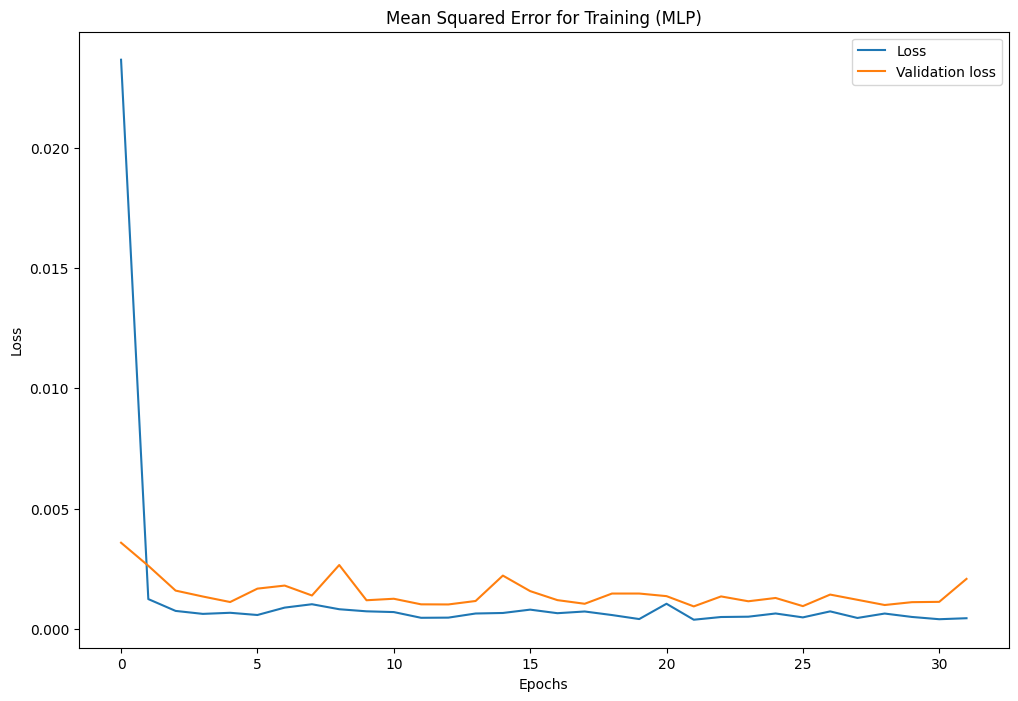

In [24]:
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (MLP)")

In [25]:
perceptron_model.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 3ms/step - loss: 9.3884e-04 - mean_squared_error: 9.3884e-04 - mean_absolute_error: 0.0225 - root_mean_squared_error: 0.0306


[0.0009388449834659696,
 0.0009388449834659696,
 0.022508203983306885,
 0.030640577897429466]

In [26]:
# Now try to predict the training and test values.
training_predict = perceptron_model.predict(feature_training)
test_predict = perceptron_model.predict(feature_test)

12/12 [==============================] - 0s 2ms/step


In [27]:
# Restore the training and test datasets' original shapes.
training_result_mlp = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_mlp = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]   [1179.172607421875]
31    2017-12-10  [1184.8400991863457]  [1190.6141357421875]
32    2017-12-11  [1224.1145485841962]  [1186.7845458984375]
33    2017-12-12  [1297.0276373650145]   [1205.351806640625]
34    2017-12-13  [1324.4906040502817]  [1270.0491943359375]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]     [2619.3388671875]
1600  2022-03-28  [2733.5177311196053]   [2678.926513671875]
1601  2022-03-29  [2768.4794493421177]    [2704.89501953125]
1602  2022-03-30  [2759.4760758914417]   [2732.572998046875]
1603  2022-03-31   [2704.099092600401]      [2736.931640625]

[1574 rows x 3 columns]


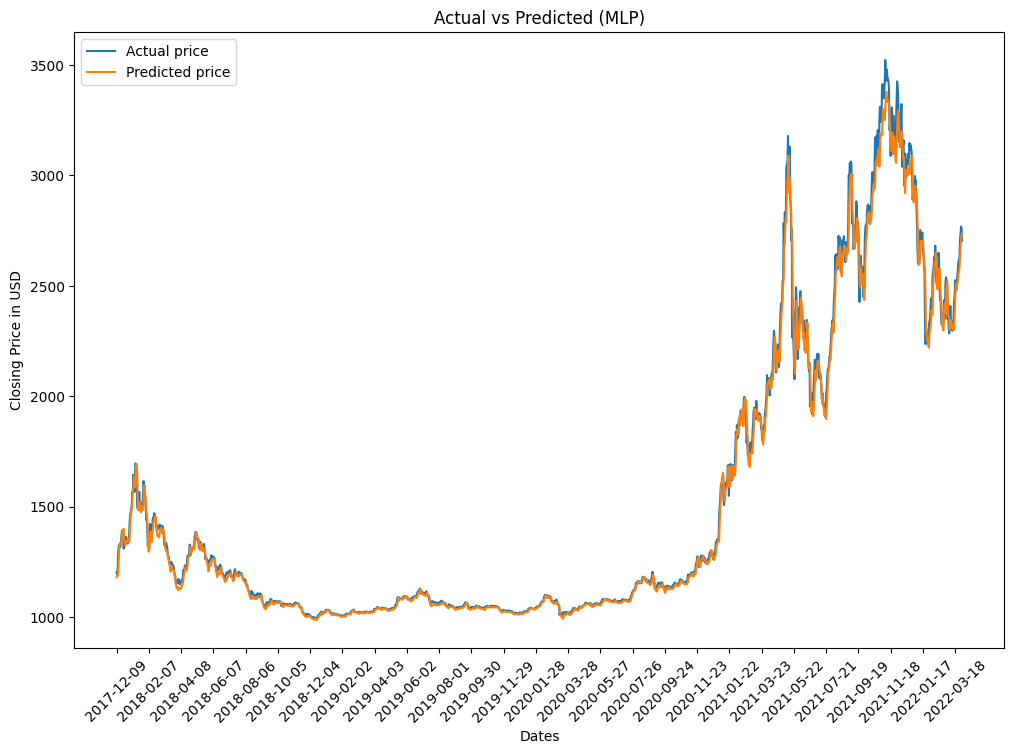

In [28]:
plot_result_train(label_training, training_result_mlp, original_data, "Actual vs Predicted (MLP)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]   [2771.331298828125]
1635  2022-05-02           [2857.4104]   [2762.352783203125]
1636  2022-05-03         [2783.476318]   [2755.636474609375]
1637  2022-05-04         [2940.644775]     [2780.3330078125]
1638  2022-05-05         [2749.213135]   [2866.034912109375]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]   [1997.747314453125]
1989  2023-04-21         [1849.999878]   [1941.199462890625]
1990  2023-04-22  [1874.2286380000003]  [1866.2462158203125]
1991  2023-04-23         [1862.062012]  [1836.6019287109375]
1992  2023-04-24         [1833.186401]  [1838.9981689453125]

[359 rows x 3 columns]


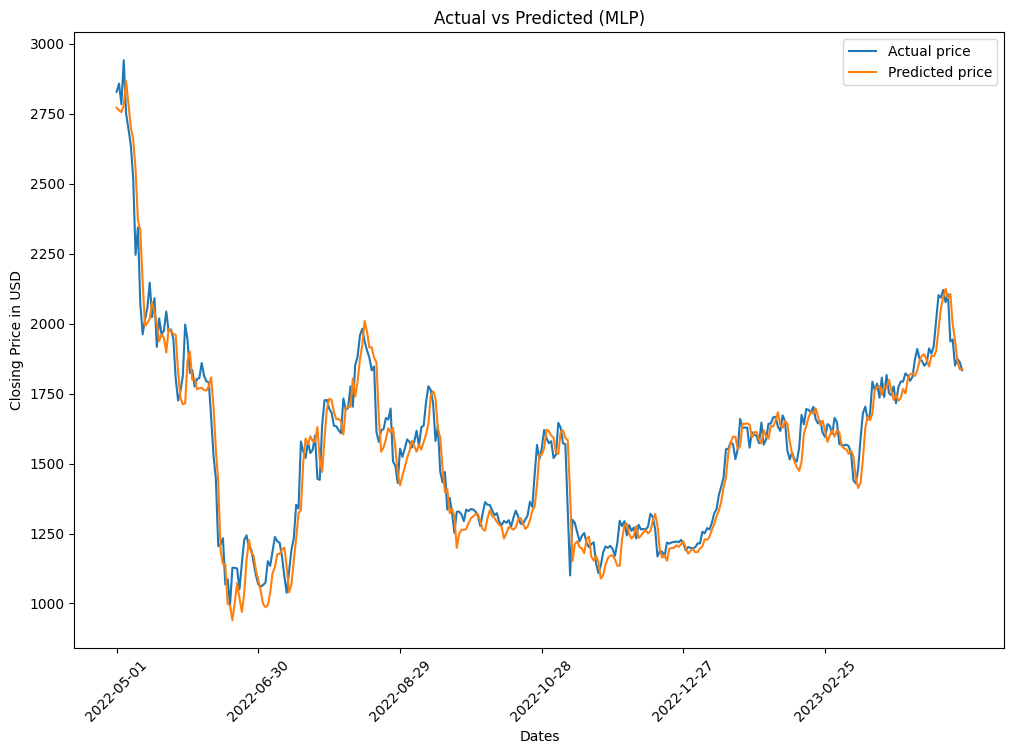

In [29]:
plot_result_test(label_test, test_result_mlp, label_training.shape[0], original_data, "Actual vs Predicted (MLP)")

In [30]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## 1-D Convolutional

In [31]:
# Build a convolutional neural network model here. Consider using Conv1D since the price list data is time-series.
cnn_model = tf.models.Sequential()
cnn_model.add(tf.layers.Conv1D(filters=30, kernel_size=3, activation='relu', input_shape=(num_steps, 1)))
cnn_model.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn_model.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn_model.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn_model.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn_model.add(tf.layers.AveragePooling1D())
cnn_model.add(tf.layers.Flatten()) # Don't forget to flatten the Conv1D layers.
cnn_model.add(tf.layers.Dense(1))
cnn_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                  metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 30)            120       
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 30)            2730      
                                                                 
 conv1d_2 (Conv1D)           (None, 24, 30)            2730      
                                                                 
 conv1d_3 (Conv1D)           (None, 22, 30)            2730      
                                                                 
 conv1d_4 (Conv1D)           (None, 20, 30)            2730      
                                                                 
 average_pooling1d (AverageP  (None, 10, 30)           0         
 ooling1D)                                                       
                                                        

In [32]:
train_result = cnn_model.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 9s 26ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - mean_absolute_error: 0.0421 - root_mean_squared_error: 0.0726 - val_loss: 0.0057 - val_mean_squared_error: 0.0057 - val_mean_absolute_error: 0.0571 - val_root_mean_squared_error: 0.0758
Epoch 2/100
50/50 [==============================] - 0s 10ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - mean_absolute_error: 0.0258 - root_mean_squared_error: 0.0465 - val_loss: 0.0046 - val_mean_squared_error: 0.0046 - val_mean_absolute_error: 0.0474 - val_root_mean_squared_error: 0.0681
Epoch 3/100
50/50 [==============================] - 0s 9ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0208 - root_mean_squared_error: 0.0380 - val_loss: 0.0036 - val_mean_squared_error: 0.0036 - val_mean_absolute_error: 0.0409 - val_root_mean_squared_error: 0.0601
Epoch 4/100
50/50 [==============================] - 0s 9ms/step - loss: 0.0012 - mean_squared_error: 0.001

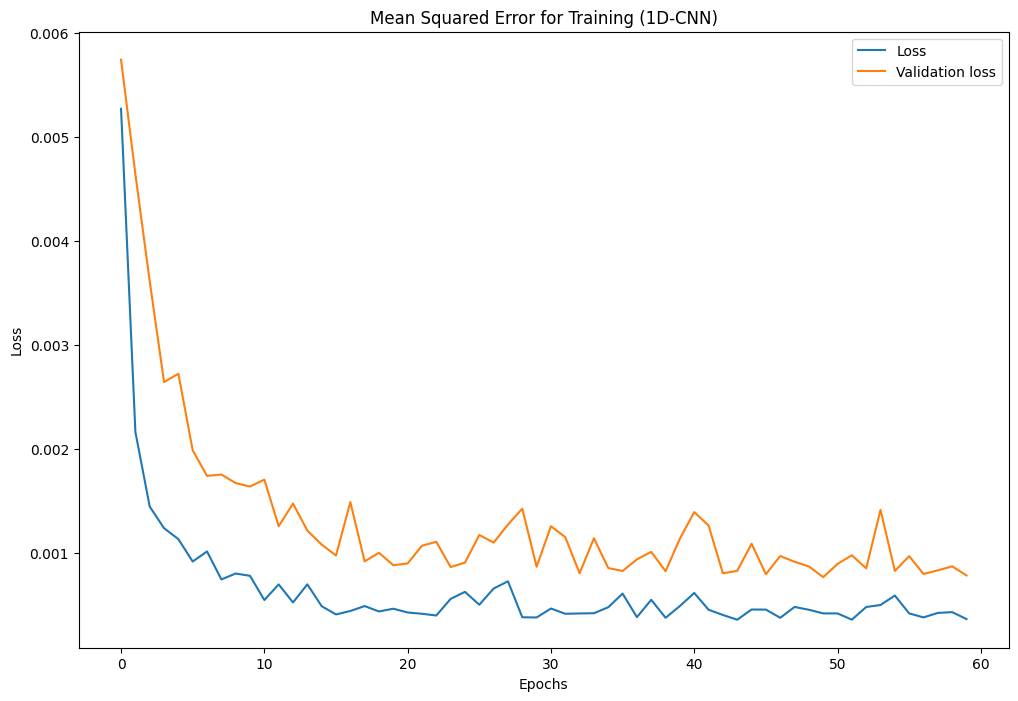

In [33]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (1D-CNN)")

In [34]:
cnn_model.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 3ms/step - loss: 7.6710e-04 - mean_squared_error: 7.6710e-04 - mean_absolute_error: 0.0196 - root_mean_squared_error: 0.0277


[0.000767104618716985,
 0.000767104618716985,
 0.019615413621068,
 0.027696654200553894]

In [35]:
# Now try to predict the training and test values.
training_predict = cnn_model.predict(feature_training)
test_predict = cnn_model.predict(feature_test)

12/12 [==============================] - 0s 2ms/step


In [36]:
# Restore the training and test datasets' original shapes.
training_result_cnn = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_cnn = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]    [1180.23095703125]
31    2017-12-10  [1184.8400991863457]  [1194.3614501953125]
32    2017-12-11  [1224.1145485841962]  [1186.9420166015625]
33    2017-12-12  [1297.0276373650145]  [1203.8204345703125]
34    2017-12-13  [1324.4906040502817]  [1275.1322021484375]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]   [2615.009521484375]
1600  2022-03-28  [2733.5177311196053]   [2692.429931640625]
1601  2022-03-29  [2768.4794493421177]    [2721.22021484375]
1602  2022-03-30  [2759.4760758914417]      [2756.431640625]
1603  2022-03-31   [2704.099092600401]   [2755.751220703125]

[1574 rows x 3 columns]


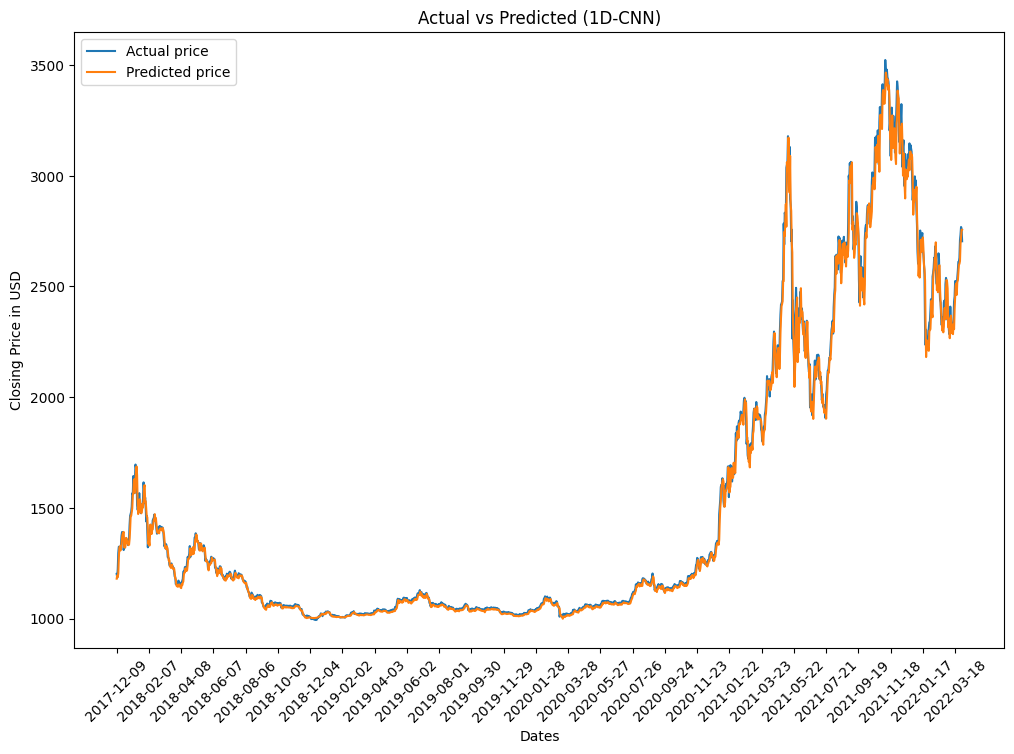

In [37]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_cnn, original_data, "Actual vs Predicted (1D-CNN)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]   [2722.718505859375]
1635  2022-05-02           [2857.4104]   [2738.179931640625]
1636  2022-05-03         [2783.476318]   [2815.795654296875]
1637  2022-05-04         [2940.644775]   [2760.711181640625]
1638  2022-05-05         [2749.213135]   [2891.078369140625]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]  [1973.7808837890625]
1989  2023-04-21         [1849.999878]   [1911.088623046875]
1990  2023-04-22  [1874.2286380000003]   [1862.031005859375]
1991  2023-04-23         [1862.062012]    [1826.46826171875]
1992  2023-04-24         [1833.186401]  [1870.3638916015625]

[359 rows x 3 columns]


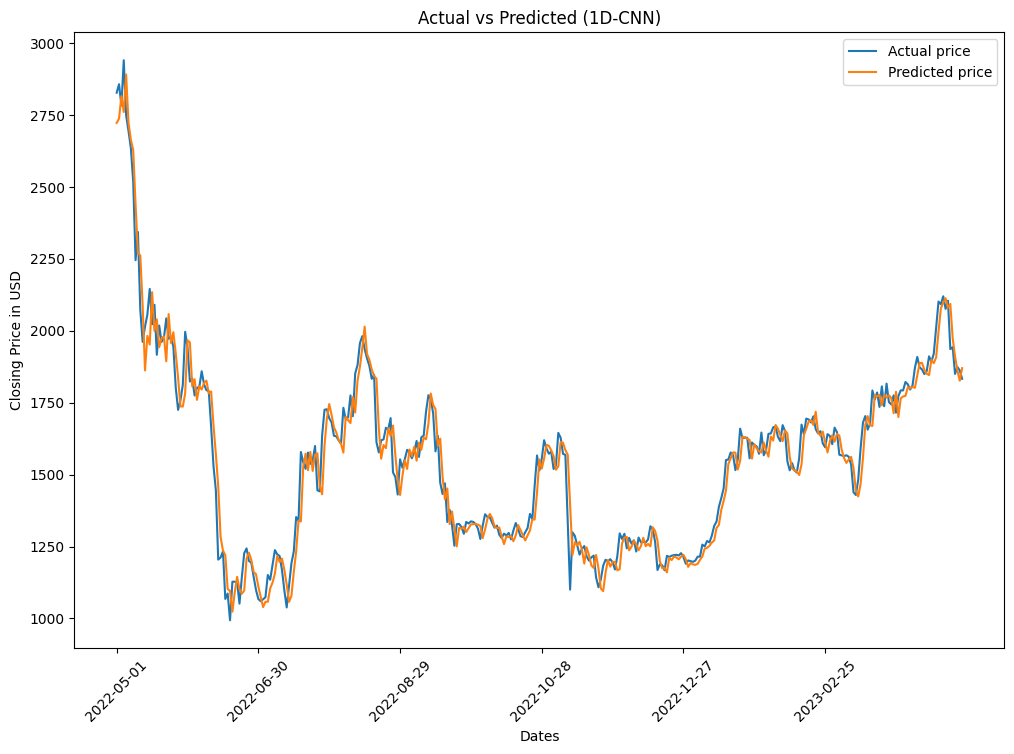

In [38]:
plot_result_test(label_test, test_result_cnn, label_training.shape[0], original_data, "Actual vs Predicted (1D-CNN)")

In [39]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## LSTM

In [40]:
# Build an LSTM model here.
lstm_model = tf.models.Sequential()
lstm_model.add(tf.layers.LSTM(units=128, activation='relu', input_shape=(num_steps, 1), return_sequences=True))
lstm_model.add(tf.layers.LSTM(units=128, return_sequences=True))
lstm_model.add(tf.layers.LSTM(units=128, return_sequences=True))
lstm_model.add(tf.layers.LSTM(units=128, return_sequences=True))
lstm_model.add(tf.layers.LSTM(units=128))
lstm_model.add(tf.layers.Dense(1))
lstm_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                   metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           131584    
                                                                 
 lstm_2 (LSTM)               (None, 30, 128)           131584    
                                                                 
 lstm_3 (LSTM)               (None, 30, 128)           131584    
                                                                 
 lstm_4 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 593,025
Trainable params: 593,025
Non-trai

In [41]:
train_result = lstm_model.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 14s 90ms/step - loss: 0.0285 - mean_squared_error: 0.0285 - mean_absolute_error: 0.0971 - root_mean_squared_error: 0.1687 - val_loss: 0.0248 - val_mean_squared_error: 0.0248 - val_mean_absolute_error: 0.1189 - val_root_mean_squared_error: 0.1576
Epoch 2/100
50/50 [==============================] - 5s 106ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - mean_absolute_error: 0.0412 - root_mean_squared_error: 0.0668 - val_loss: 0.0133 - val_mean_squared_error: 0.0133 - val_mean_absolute_error: 0.0859 - val_root_mean_squared_error: 0.1155
Epoch 3/100
50/50 [==============================] - 3s 62ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - mean_absolute_error: 0.0325 - root_mean_squared_error: 0.0562 - val_loss: 0.0119 - val_mean_squared_error: 0.0119 - val_mean_absolute_error: 0.0808 - val_root_mean_squared_error: 0.1093
Epoch 4/100
50/50 [==============================] - 3s 63ms/step - loss: 0.0031 - mean_squared_error: 0

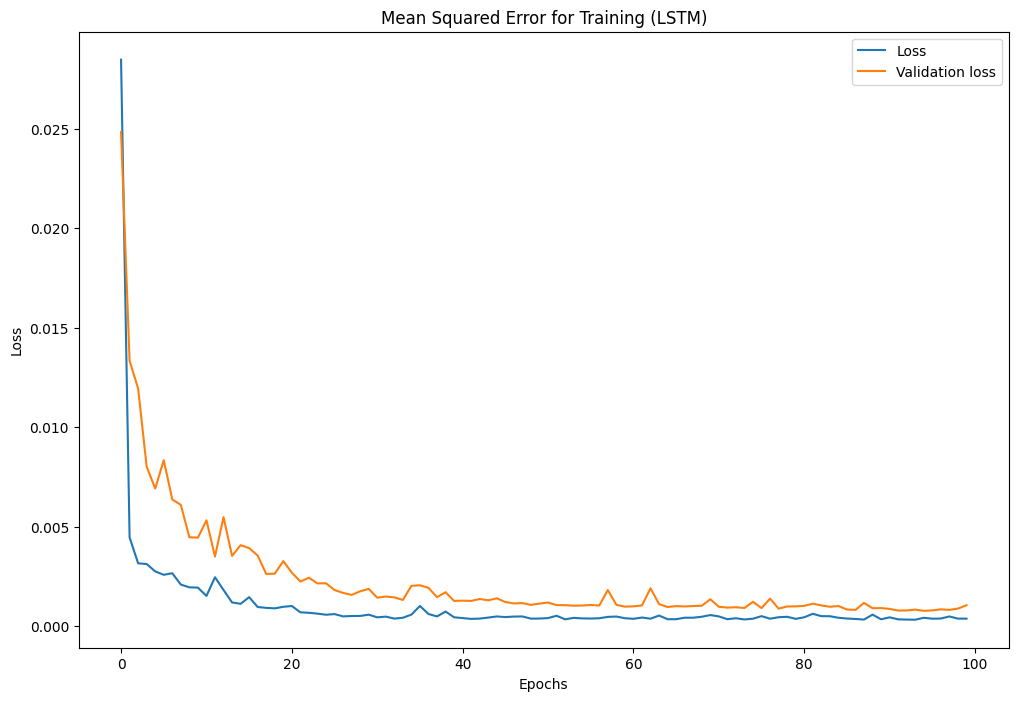

In [42]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (LSTM)")

In [43]:
lstm_model.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 13ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0235 - root_mean_squared_error: 0.0326


[0.0010597317013889551,
 0.0010597317013889551,
 0.023539429530501366,
 0.03255352005362511]

In [44]:
# Now try to predict the training and test values.
training_predict = lstm_model.predict(feature_training)
test_predict = lstm_model.predict(feature_test)

12/12 [==============================] - 0s 9ms/step


In [45]:
# Restore the training and test datasets' original shapes.
training_result_lstm = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_lstm = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]   [1212.586669921875]
31    2017-12-10  [1184.8400991863457]  [1223.0701904296875]
32    2017-12-11  [1224.1145485841962]  [1220.7393798828125]
33    2017-12-12  [1297.0276373650145]  [1236.4403076171875]
34    2017-12-13  [1324.4906040502817]  [1291.0804443359375]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]   [2702.485107421875]
1600  2022-03-28  [2733.5177311196053]      [2783.345703125]
1601  2022-03-29  [2768.4794493421177]     [2811.5341796875]
1602  2022-03-30  [2759.4760758914417]     [2846.8447265625]
1603  2022-03-31   [2704.099092600401]   [2837.438232421875]

[1574 rows x 3 columns]


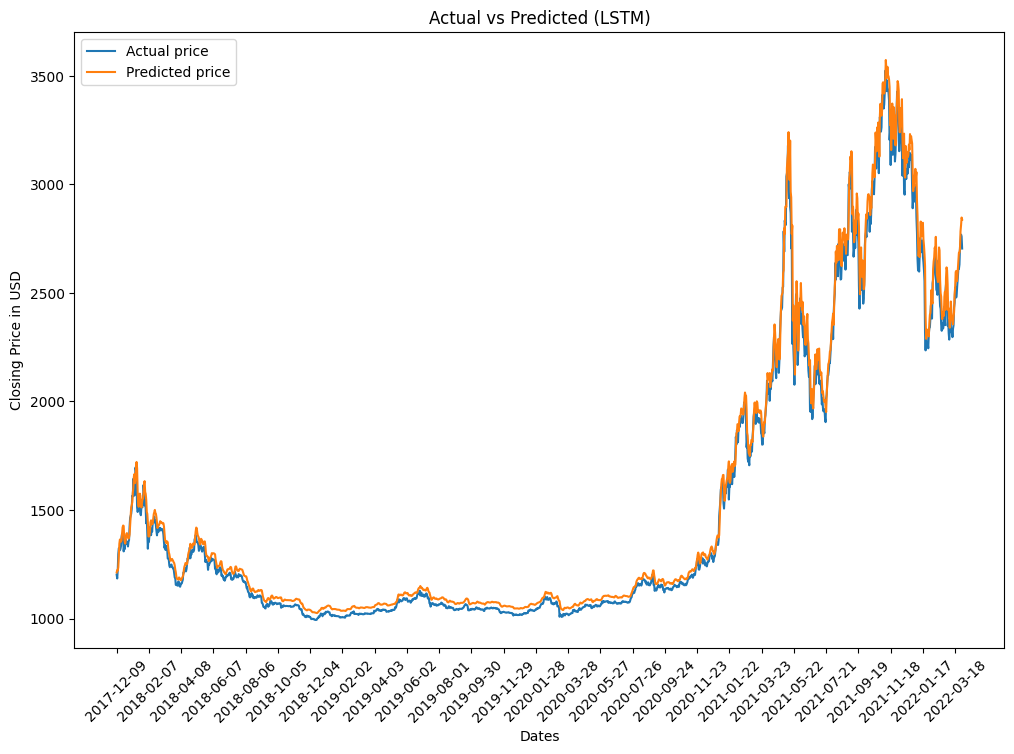

In [46]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_lstm, original_data, "Actual vs Predicted (LSTM)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]    [2803.34716796875]
1635  2022-05-02           [2857.4104]    [2900.23486328125]
1636  2022-05-03         [2783.476318]      [2935.025390625]
1637  2022-05-04         [2940.644775]   [2857.732666015625]
1638  2022-05-05         [2749.213135]   [3023.172119140625]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]   [2014.966064453125]
1989  2023-04-21         [1849.999878]  [1977.9661865234375]
1990  2023-04-22  [1874.2286380000003]  [1904.4473876953125]
1991  2023-04-23         [1862.062012]  [1898.4581298828125]
1992  2023-04-24         [1833.186401]    [1896.93798828125]

[359 rows x 3 columns]


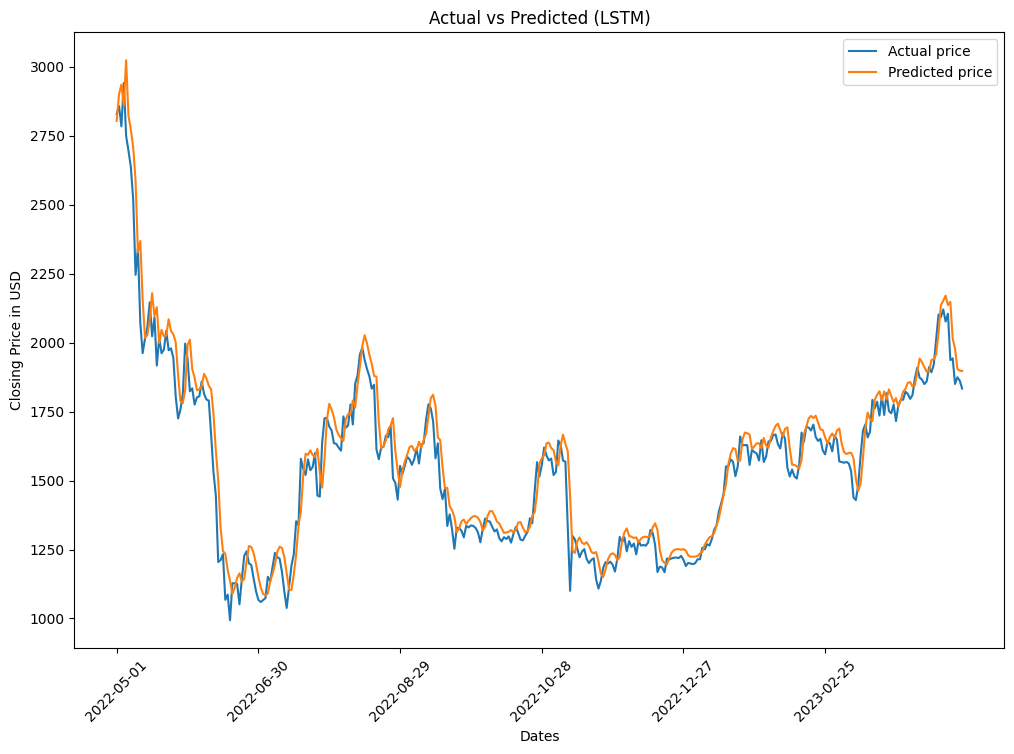

In [47]:
plot_result_test(label_test, test_result_lstm, label_training.shape[0], original_data, "Actual vs Predicted (LSTM)")

In [48]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## GRU

In [49]:
# Build a GRU model here.
gru_model = tf.models.Sequential()
gru_model.add(tf.layers.GRU(units=128, activation='relu', input_shape=(num_steps, 1), return_sequences=True))
gru_model.add(tf.layers.GRU(units=128, return_sequences=True))
gru_model.add(tf.layers.GRU(units=128, return_sequences=True))
gru_model.add(tf.layers.GRU(units=128, return_sequences=True))
gru_model.add(tf.layers.GRU(units=128))
gru_model.add(tf.layers.Dense(1))
gru_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                  metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])
gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 128)           50304     
                                                                 
 gru_1 (GRU)                 (None, 30, 128)           99072     
                                                                 
 gru_2 (GRU)                 (None, 30, 128)           99072     
                                                                 
 gru_3 (GRU)                 (None, 30, 128)           99072     
                                                                 
 gru_4 (GRU)                 (None, 128)               99072     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 446,721
Trainable params: 446,721
Non-trai

In [50]:
train_result = gru_model.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 16s 109ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - mean_absolute_error: 0.0640 - root_mean_squared_error: 0.1059 - val_loss: 0.0058 - val_mean_squared_error: 0.0058 - val_mean_absolute_error: 0.0522 - val_root_mean_squared_error: 0.0763
Epoch 2/100
50/50 [==============================] - 5s 93ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0214 - root_mean_squared_error: 0.0365 - val_loss: 0.0035 - val_mean_squared_error: 0.0035 - val_mean_absolute_error: 0.0414 - val_root_mean_squared_error: 0.0594
Epoch 3/100
50/50 [==============================] - 5s 96ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0199 - root_mean_squared_error: 0.0340 - val_loss: 0.0029 - val_mean_squared_error: 0.0029 - val_mean_absolute_error: 0.0375 - val_root_mean_squared_error: 0.0542
Epoch 4/100
50/50 [==============================] - 4s 77ms/step - loss: 9.4373e-04 - mean_squared_erro

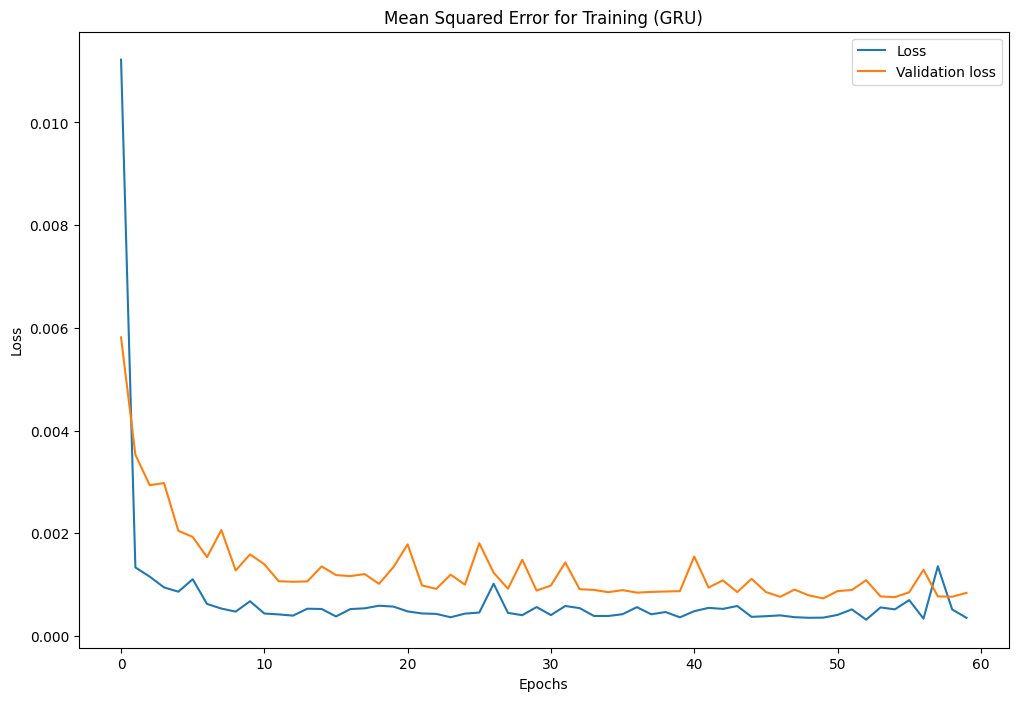

In [51]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (GRU)")

In [52]:
gru_model.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 14ms/step - loss: 7.3048e-04 - mean_squared_error: 7.3048e-04 - mean_absolute_error: 0.0185 - root_mean_squared_error: 0.0270


[0.0007304822211153805,
 0.0007304822211153805,
 0.018500737845897675,
 0.02702743373811245]

In [53]:
# Now try to predict the training and test values.
training_predict = gru_model.predict(feature_training)
test_predict = gru_model.predict(feature_test)

12/12 [==============================] - 0s 10ms/step


In [54]:
# Restore the training and test datasets' original shapes.
training_result_gru = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_gru = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]  [1194.9075927734375]
31    2017-12-10  [1184.8400991863457]    [1204.09619140625]
32    2017-12-11  [1224.1145485841962]   [1196.763427734375]
33    2017-12-12  [1297.0276373650145]  [1217.4681396484375]
34    2017-12-13  [1324.4906040502817]  [1273.8878173828125]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]    [2585.09912109375]
1600  2022-03-28  [2733.5177311196053]    [2657.97705078125]
1601  2022-03-29  [2768.4794493421177]   [2685.150146484375]
1602  2022-03-30  [2759.4760758914417]    [2718.04443359375]
1603  2022-03-31   [2704.099092600401]   [2708.939697265625]

[1574 rows x 3 columns]


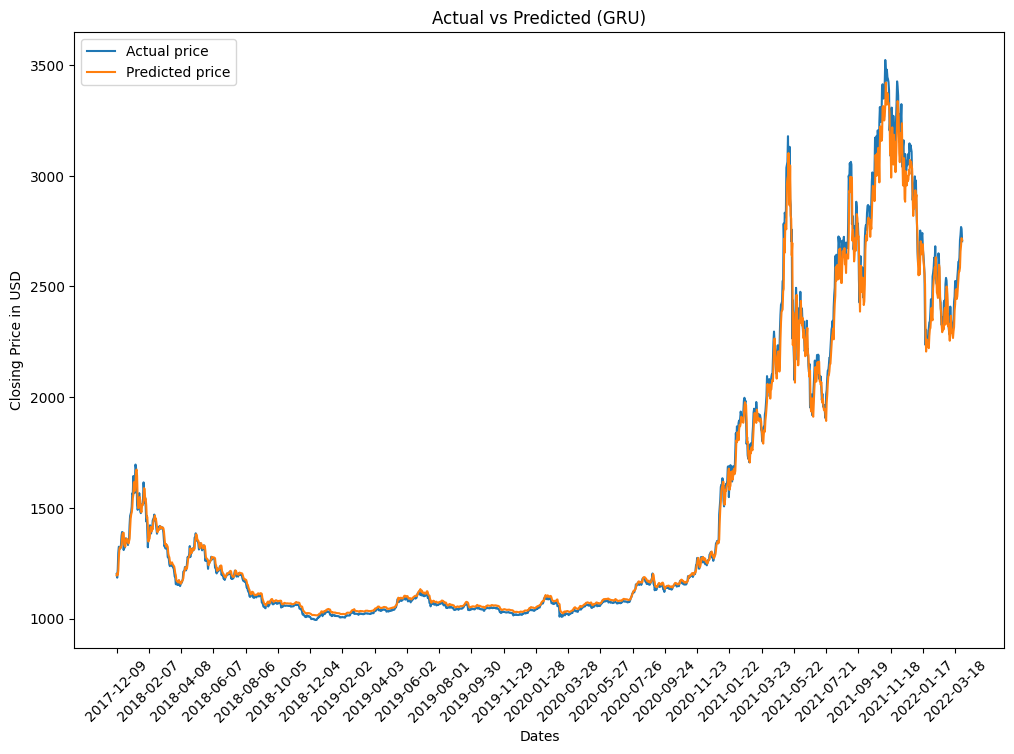

In [55]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_gru, original_data, "Actual vs Predicted (GRU)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]    [2674.84716796875]
1635  2022-05-02           [2857.4104]   [2765.622802734375]
1636  2022-05-03         [2783.476318]   [2800.093017578125]
1637  2022-05-04         [2940.644775]       [2732.65234375]
1638  2022-05-05         [2749.213135]    [2877.33349609375]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]  [1939.8629150390625]
1989  2023-04-21         [1849.999878]  [1922.1842041015625]
1990  2023-04-22  [1874.2286380000003]  [1848.3114013671875]
1991  2023-04-23         [1862.062012]  [1854.1314697265625]
1992  2023-04-24         [1833.186401]     [1849.5849609375]

[359 rows x 3 columns]


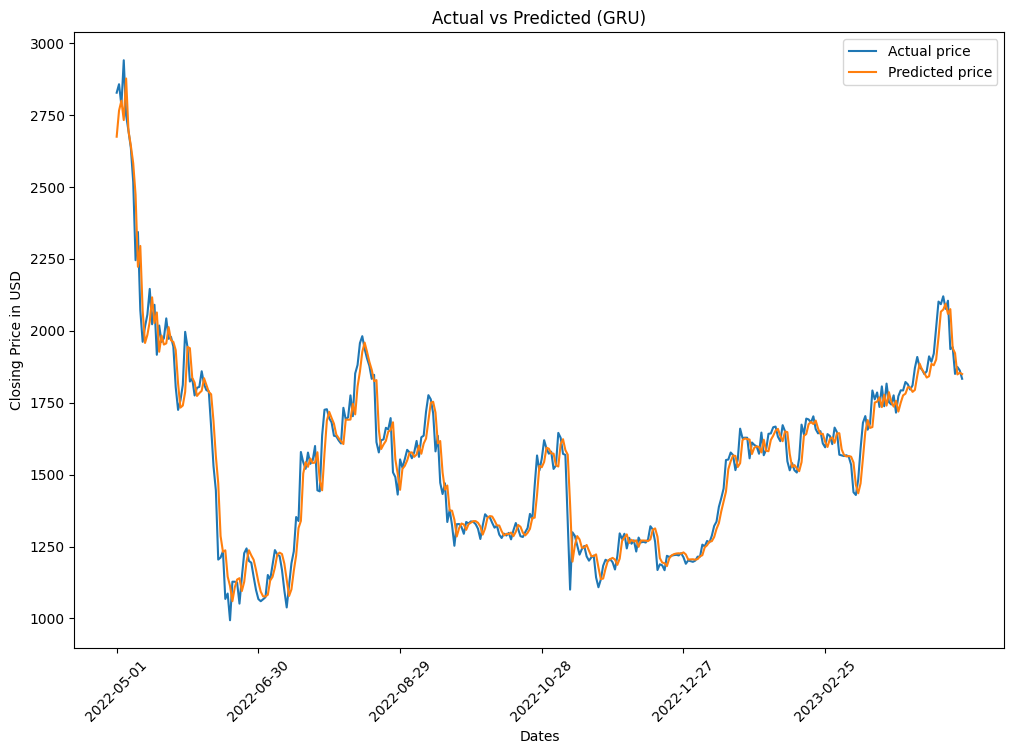

In [56]:
plot_result_test(label_test, test_result_gru, label_training.shape[0], original_data, "Actual vs Predicted (GRU)")

In [57]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

# Model with Dropout

## Do the same procedures like the baseline model, except also implement the dropout rates and regularizers for each model, and then combine the two together.

## Perceptron

In [58]:
perceptron_model_dropout = tf.models.Sequential()
perceptron_model_dropout.add(tf.layers.Input(shape=(num_steps,)))
perceptron_model_dropout.add(tf.layers.Dense(128, activation='tanh'))
perceptron_model_dropout.add(tf.layers.Dropout(0.2))
perceptron_model_dropout.add(tf.layers.Dense(128, activation='tanh'))
perceptron_model_dropout.add(tf.layers.Dropout(0.2))
perceptron_model_dropout.add(tf.layers.Dense(128, activation='tanh'))
perceptron_model_dropout.add(tf.layers.Dropout(0.2))
perceptron_model_dropout.add(tf.layers.Dense(128, activation='tanh'))
perceptron_model_dropout.add(tf.layers.Dropout(0.2))
perceptron_model_dropout.add(tf.layers.Dense(128, activation='tanh'))
perceptron_model_dropout.add(tf.layers.Dropout(0.2))
perceptron_model_dropout.add(tf.layers.Dense(1))
perceptron_model_dropout.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                       metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])
perceptron_model_dropout.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               1

In [59]:
train_result = perceptron_model_dropout.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 4s 14ms/step - loss: 0.0495 - mean_squared_error: 0.0495 - mean_absolute_error: 0.1236 - root_mean_squared_error: 0.2224 - val_loss: 0.0216 - val_mean_squared_error: 0.0216 - val_mean_absolute_error: 0.1171 - val_root_mean_squared_error: 0.1471
Epoch 2/100
50/50 [==============================] - 0s 9ms/step - loss: 0.0186 - mean_squared_error: 0.0186 - mean_absolute_error: 0.0749 - root_mean_squared_error: 0.1365 - val_loss: 0.0097 - val_mean_squared_error: 0.0097 - val_mean_absolute_error: 0.0735 - val_root_mean_squared_error: 0.0983
Epoch 3/100
50/50 [==============================] - 0s 9ms/step - loss: 0.0137 - mean_squared_error: 0.0137 - mean_absolute_error: 0.0630 - root_mean_squared_error: 0.1171 - val_loss: 0.0058 - val_mean_squared_error: 0.0058 - val_mean_absolute_error: 0.0562 - val_root_mean_squared_error: 0.0763
Epoch 4/100
50/50 [==============================] - 0s 7ms/step - loss: 0.0113 - mean_squared_error: 0.0113

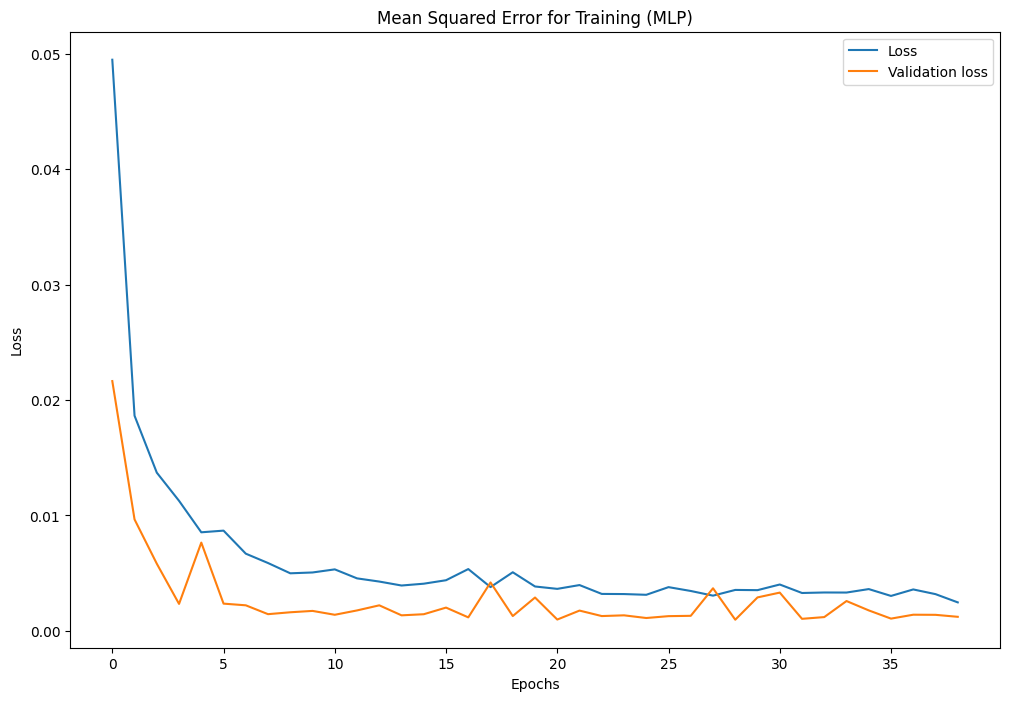

In [60]:
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (MLP)")

In [61]:
perceptron_model_dropout.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 4ms/step - loss: 9.6477e-04 - mean_squared_error: 9.6477e-04 - mean_absolute_error: 0.0220 - root_mean_squared_error: 0.0311


[0.0009647701517678797,
 0.0009647701517678797,
 0.022012358531355858,
 0.031060749664902687]

In [62]:
# Now try to predict the training and test values.
training_predict = perceptron_model_dropout.predict(feature_training)
test_predict = perceptron_model_dropout.predict(feature_test)

12/12 [==============================] - 0s 3ms/step


In [63]:
# Restore the training and test datasets' original shapes.
training_result_mlp = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_mlp = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]  [1199.4835205078125]
31    2017-12-10  [1184.8400991863457]   [1209.221435546875]
32    2017-12-11  [1224.1145485841962]  [1208.0399169921875]
33    2017-12-12  [1297.0276373650145]  [1220.6260986328125]
34    2017-12-13  [1324.4906040502817]  [1265.5164794921875]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]    [2543.93994140625]
1600  2022-03-28  [2733.5177311196053]    [2576.25537109375]
1601  2022-03-29  [2768.4794493421177]   [2617.122802734375]
1602  2022-03-30  [2759.4760758914417]    [2622.86572265625]
1603  2022-03-31   [2704.099092600401]   [2637.314697265625]

[1574 rows x 3 columns]


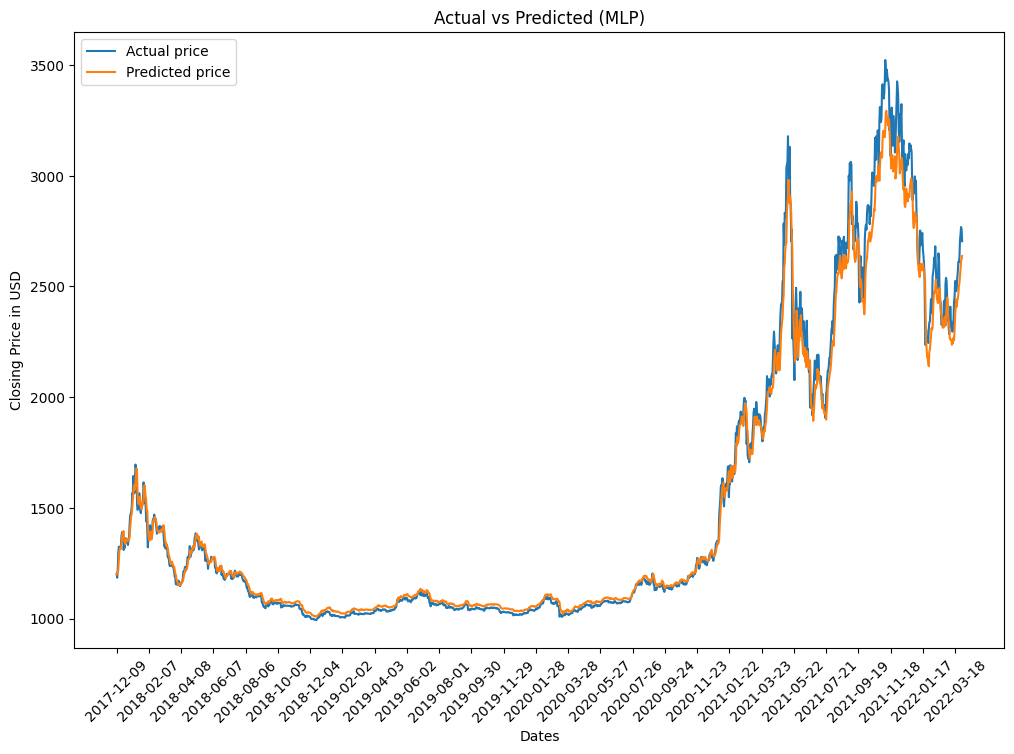

In [64]:
plot_result_train(label_training, training_result_mlp, original_data, "Actual vs Predicted (MLP)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]      [2663.185546875]
1635  2022-05-02           [2857.4104]   [2620.511962890625]
1636  2022-05-03         [2783.476318]       [2662.88671875]
1637  2022-05-04         [2940.644775]    [2672.74072265625]
1638  2022-05-05         [2749.213135]    [2736.20849609375]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]  [1995.5220947265625]
1989  2023-04-21         [1849.999878]        [1963.3515625]
1990  2023-04-22  [1874.2286380000003]      [1905.705078125]
1991  2023-04-23         [1862.062012]  [1891.7911376953125]
1992  2023-04-24         [1833.186401]  [1876.7696533203125]

[359 rows x 3 columns]


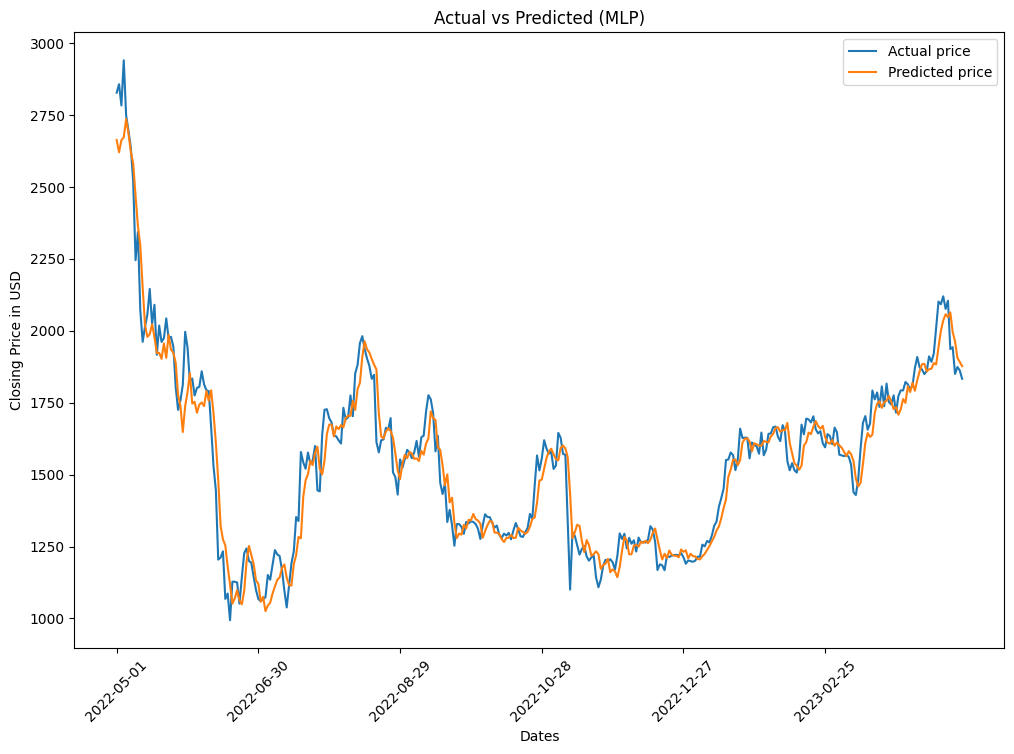

In [65]:
plot_result_test(label_test, test_result_mlp, label_training.shape[0], original_data, "Actual vs Predicted (MLP)")

In [66]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## 1-D Convolutional

In [67]:
cnn_model_dropout = tf.models.Sequential()
cnn_model_dropout.add(tf.layers.Conv1D(filters=30, kernel_size=3, activation='relu', input_shape=(num_steps, 1)))
cnn_model_dropout.add(tf.layers.Dropout(0.2))
cnn_model_dropout.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn_model_dropout.add(tf.layers.Dropout(0.2))
cnn_model_dropout.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn_model_dropout.add(tf.layers.Dropout(0.2))
cnn_model_dropout.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn_model_dropout.add(tf.layers.Dropout(0.2))
cnn_model_dropout.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn_model_dropout.add(tf.layers.Dropout(0.2))
cnn_model_dropout.add(tf.layers.AveragePooling1D())
cnn_model_dropout.add(tf.layers.Flatten()) # Don't forget to flatten the Conv1D layers.
cnn_model_dropout.add(tf.layers.Dense(1))
cnn_model_dropout.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                       metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])
cnn_model_dropout.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 30)            120       
                                                                 
 dropout (Dropout)           (None, 28, 30)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 30)            2730      
                                                                 
 dropout_1 (Dropout)         (None, 26, 30)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 24, 30)            2730      
                                                                 
 dropout_2 (Dropout)         (None, 24, 30)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 22, 30)            2

In [68]:
train_result = cnn_model_dropout.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 3s 12ms/step - loss: 0.0140 - mean_squared_error: 0.0140 - mean_absolute_error: 0.0685 - root_mean_squared_error: 0.1182 - val_loss: 0.0063 - val_mean_squared_error: 0.0063 - val_mean_absolute_error: 0.0615 - val_root_mean_squared_error: 0.0796
Epoch 2/100
50/50 [==============================] - 0s 8ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0498 - root_mean_squared_error: 0.0847 - val_loss: 0.0100 - val_mean_squared_error: 0.0100 - val_mean_absolute_error: 0.0707 - val_root_mean_squared_error: 0.0999
Epoch 3/100
50/50 [==============================] - 0s 7ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - mean_absolute_error: 0.0408 - root_mean_squared_error: 0.0711 - val_loss: 0.0084 - val_mean_squared_error: 0.0084 - val_mean_absolute_error: 0.0662 - val_root_mean_squared_error: 0.0917
Epoch 4/100
50/50 [==============================] - 0s 7ms/step - loss: 0.0049 - mean_squared_error: 0.0049

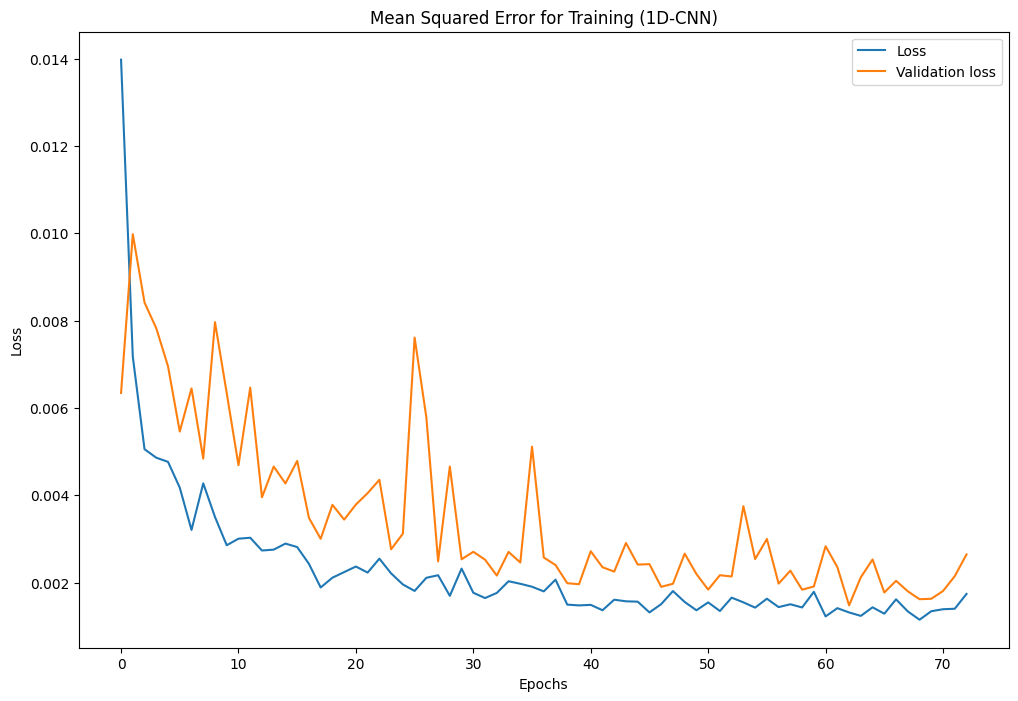

In [69]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (1D-CNN)")

In [70]:
cnn_model_dropout.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 3ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - mean_absolute_error: 0.0275 - root_mean_squared_error: 0.0385


[0.00147971638944,
 0.00147971638944,
 0.027471542358398438,
 0.038467083126306534]

In [71]:
# Now try to predict the training and test values.
training_predict = cnn_model_dropout.predict(feature_training)
test_predict = cnn_model_dropout.predict(feature_test)

12/12 [==============================] - 0s 2ms/step


In [72]:
# Restore the training and test datasets' original shapes.
training_result_cnn = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_cnn = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]    [1152.98583984375]
31    2017-12-10  [1184.8400991863457]  [1162.9720458984375]
32    2017-12-11  [1224.1145485841962]         [1166.203125]
33    2017-12-12  [1297.0276373650145]   [1169.537353515625]
34    2017-12-13  [1324.4906040502817]   [1205.600830078125]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]    [2581.56884765625]
1600  2022-03-28  [2733.5177311196053]     [2620.8310546875]
1601  2022-03-29  [2768.4794493421177]   [2668.088623046875]
1602  2022-03-30  [2759.4760758914417]     [2706.8173828125]
1603  2022-03-31   [2704.099092600401]   [2728.466552734375]

[1574 rows x 3 columns]


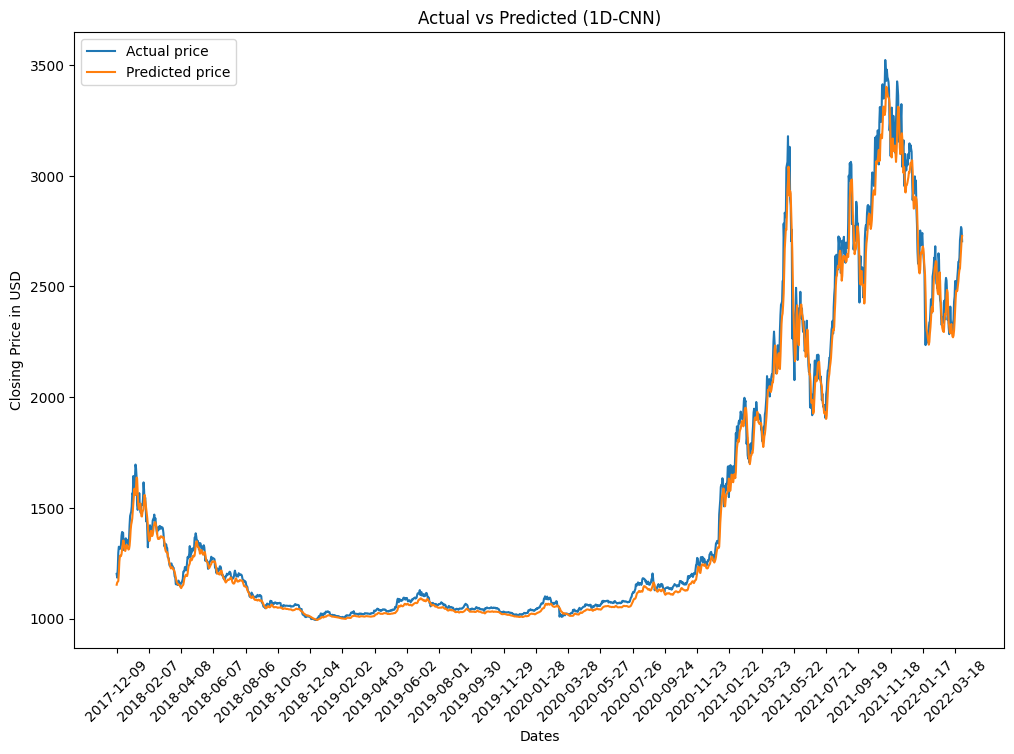

In [73]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_cnn, original_data, "Actual vs Predicted (1D-CNN)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]     [2742.6982421875]
1635  2022-05-02           [2857.4104]   [2716.487548828125]
1636  2022-05-03         [2783.476318]   [2743.413330078125]
1637  2022-05-04         [2940.644775]   [2754.248779296875]
1638  2022-05-05         [2749.213135]   [2793.669677734375]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]  [2017.4305419921875]
1989  2023-04-21         [1849.999878]  [1948.4554443359375]
1990  2023-04-22  [1874.2286380000003]  [1893.8385009765625]
1991  2023-04-23         [1862.062012]   [1852.251220703125]
1992  2023-04-24         [1833.186401]  [1845.0443115234375]

[359 rows x 3 columns]


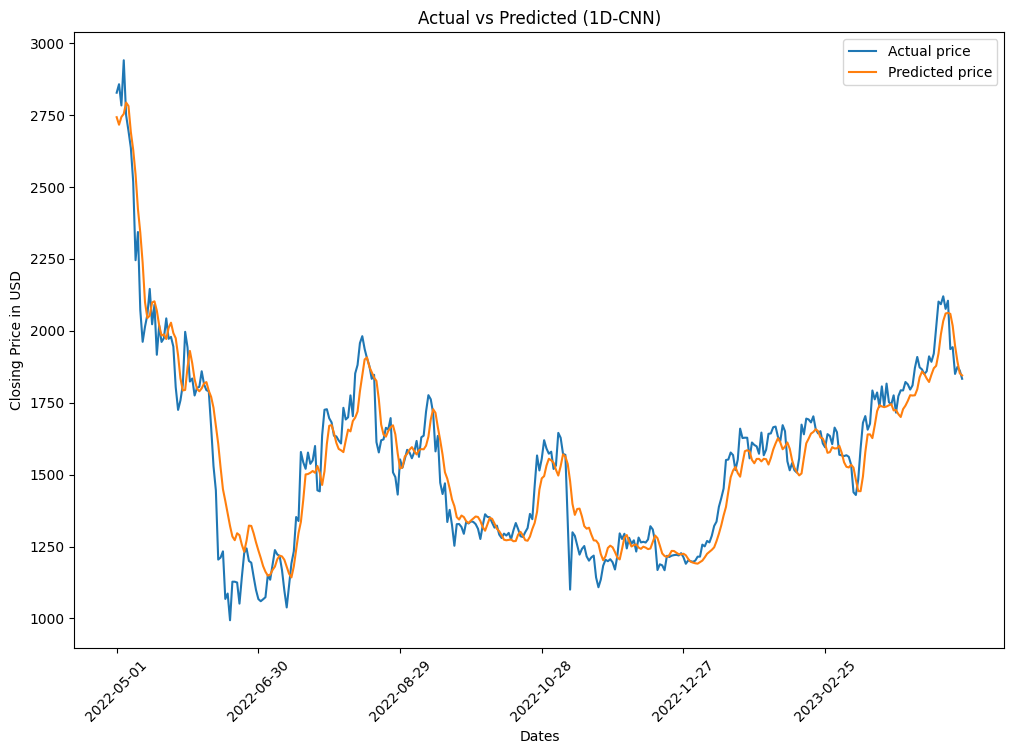

In [74]:
plot_result_test(label_test, test_result_cnn, label_training.shape[0], original_data, "Actual vs Predicted (1D-CNN)")

In [75]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## LSTM

In [76]:
lstm_model_dropout = tf.models.Sequential()
lstm_model_dropout.add(tf.layers.LSTM(units=128, activation='relu', input_shape=(num_steps, 1), return_sequences=True))
lstm_model_dropout.add(tf.layers.Dropout(0.2))
lstm_model_dropout.add(tf.layers.LSTM(units=128, return_sequences=True))
lstm_model_dropout.add(tf.layers.Dropout(0.2))
lstm_model_dropout.add(tf.layers.LSTM(units=128, return_sequences=True))
lstm_model_dropout.add(tf.layers.Dropout(0.2))
lstm_model_dropout.add(tf.layers.LSTM(units=128, return_sequences=True))
lstm_model_dropout.add(tf.layers.Dropout(0.2))
lstm_model_dropout.add(tf.layers.LSTM(units=128))
lstm_model_dropout.add(tf.layers.Dropout(0.2))
lstm_model_dropout.add(tf.layers.Dense(1))
lstm_model_dropout.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                       metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])
lstm_model_dropout.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 30, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 30, 128)           131584    
                                                                 
 dropout_2 (Dropout)         (None, 30, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 30, 128)           1

In [77]:
train_result = lstm_model_dropout.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 14s 93ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - mean_absolute_error: 0.0552 - root_mean_squared_error: 0.0967 - val_loss: 0.0162 - val_mean_squared_error: 0.0162 - val_mean_absolute_error: 0.0942 - val_root_mean_squared_error: 0.1274
Epoch 2/100
50/50 [==============================] - 3s 66ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - mean_absolute_error: 0.0374 - root_mean_squared_error: 0.0631 - val_loss: 0.0269 - val_mean_squared_error: 0.0269 - val_mean_absolute_error: 0.1230 - val_root_mean_squared_error: 0.1641
Epoch 3/100
50/50 [==============================] - 5s 102ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - mean_absolute_error: 0.0370 - root_mean_squared_error: 0.0653 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0679 - val_root_mean_squared_error: 0.0889
Epoch 4/100
50/50 [==============================] - 3s 65ms/step - loss: 0.0031 - mean_squared_error: 0

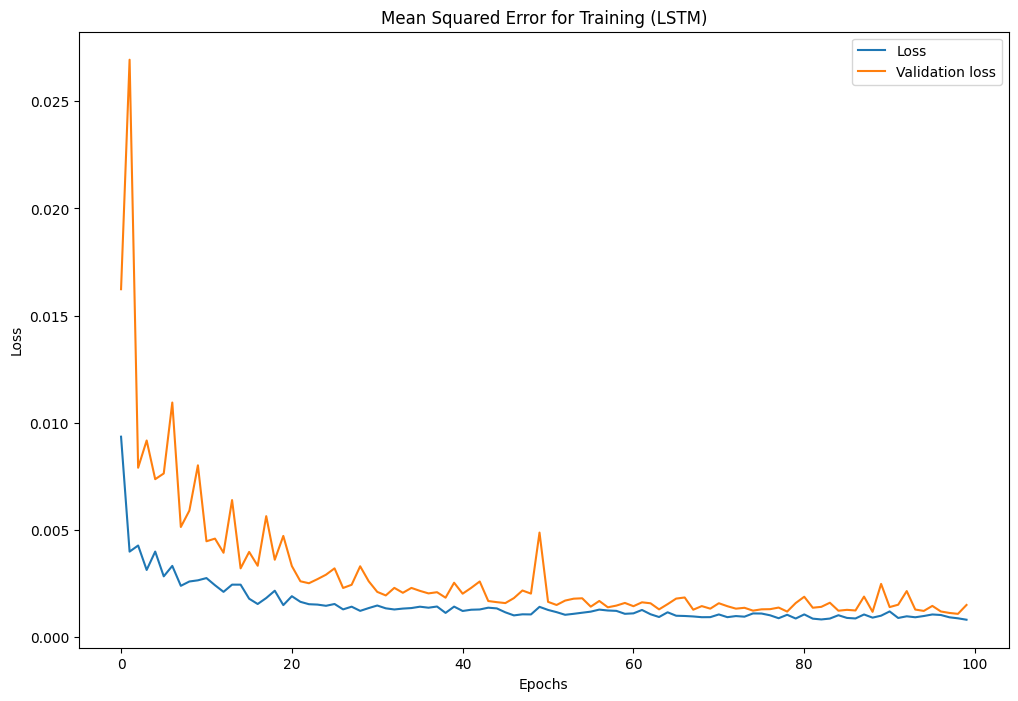

In [78]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (LSTM)")

In [79]:
lstm_model_dropout.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 13ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - mean_absolute_error: 0.0266 - root_mean_squared_error: 0.0386


[0.0014877881621941924,
 0.0014877881621941924,
 0.026641422882676125,
 0.038571856915950775]

In [80]:
# Now try to predict the training and test values.
training_predict = lstm_model_dropout.predict(feature_training)
test_predict = lstm_model_dropout.predict(feature_test)

12/12 [==============================] - 0s 9ms/step


In [81]:
# Restore the training and test datasets' original shapes.
training_result_lstm = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_lstm = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]     [1183.1748046875]
31    2017-12-10  [1184.8400991863457]  [1188.3560791015625]
32    2017-12-11  [1224.1145485841962]   [1189.246337890625]
33    2017-12-12  [1297.0276373650145]  [1198.7244873046875]
34    2017-12-13  [1324.4906040502817]       [1233.08984375]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]    [2679.32275390625]
1600  2022-03-28  [2733.5177311196053]   [2730.027099609375]
1601  2022-03-29  [2768.4794493421177]     [2768.8466796875]
1602  2022-03-30  [2759.4760758914417]   [2800.628173828125]
1603  2022-03-31   [2704.099092600401]     [2803.7314453125]

[1574 rows x 3 columns]


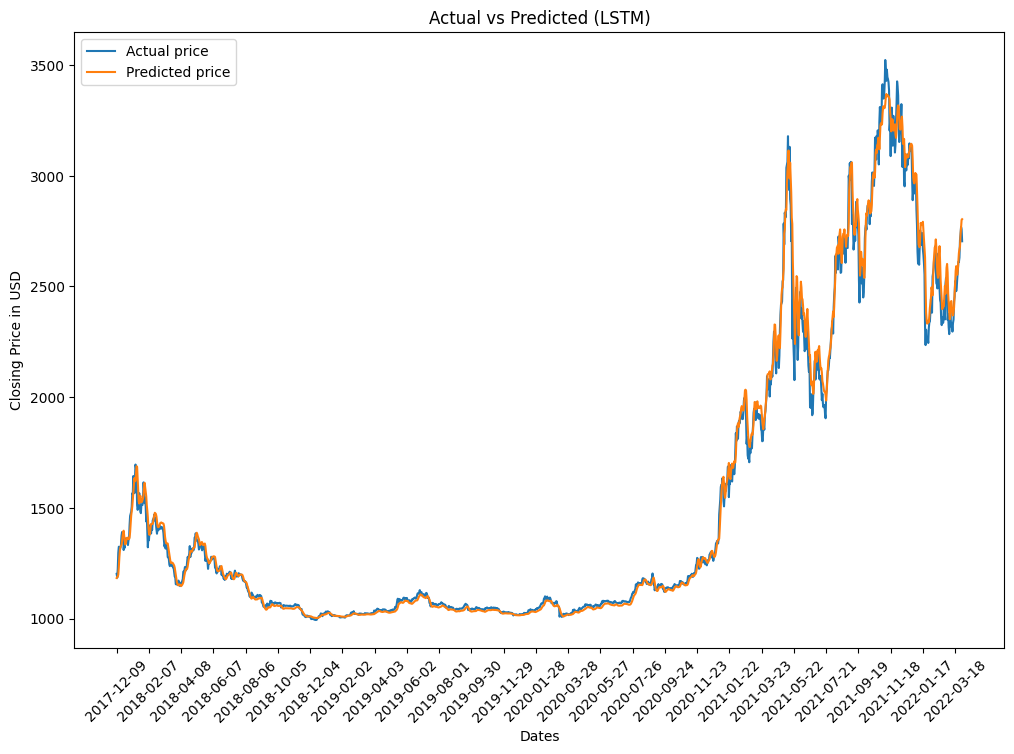

In [82]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_lstm, original_data, "Actual vs Predicted (LSTM)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]   [2819.053955078125]
1635  2022-05-02           [2857.4104]   [2834.364013671875]
1636  2022-05-03         [2783.476318]   [2872.843994140625]
1637  2022-05-04         [2940.644775]      [2851.337890625]
1638  2022-05-05         [2749.213135]   [2918.779052734375]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]    [2064.36962890625]
1989  2023-04-21         [1849.999878]   [2002.913818359375]
1990  2023-04-22  [1874.2286380000003]  [1938.4022216796875]
1991  2023-04-23         [1862.062012]  [1912.8929443359375]
1992  2023-04-24         [1833.186401]  [1910.2149658203125]

[359 rows x 3 columns]


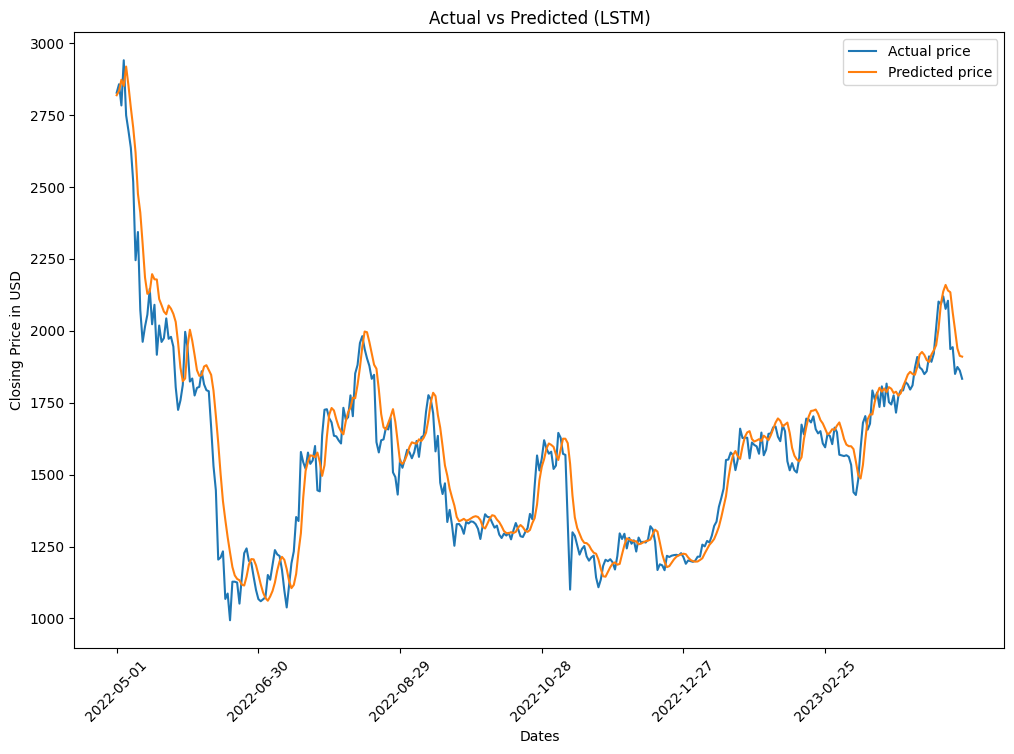

In [83]:
plot_result_test(label_test, test_result_lstm, label_training.shape[0], original_data, "Actual vs Predicted (LSTM)")

In [84]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## GRU

In [85]:
gru_model_dropout = tf.models.Sequential()
gru_model_dropout.add(tf.layers.GRU(units=128, activation='relu', input_shape=(num_steps, 1), return_sequences=True))
gru_model_dropout.add(tf.layers.Dropout(0.2))
gru_model_dropout.add(tf.layers.GRU(units=128, return_sequences=True))
gru_model_dropout.add(tf.layers.Dropout(0.2))
gru_model_dropout.add(tf.layers.GRU(units=128, return_sequences=True))
gru_model_dropout.add(tf.layers.Dropout(0.2))
gru_model_dropout.add(tf.layers.GRU(units=128, return_sequences=True))
gru_model_dropout.add(tf.layers.Dropout(0.2))
gru_model_dropout.add(tf.layers.GRU(units=128))
gru_model_dropout.add(tf.layers.Dropout(0.2))
gru_model_dropout.add(tf.layers.Dense(1))
gru_model_dropout.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                       metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])
gru_model_dropout.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 128)           50304     
                                                                 
 dropout (Dropout)           (None, 30, 128)           0         
                                                                 
 gru_1 (GRU)                 (None, 30, 128)           99072     
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 gru_2 (GRU)                 (None, 30, 128)           99072     
                                                                 
 dropout_2 (Dropout)         (None, 30, 128)           0         
                                                                 
 gru_3 (GRU)                 (None, 30, 128)           9

In [86]:
train_result = gru_model_dropout.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 14s 103ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - mean_absolute_error: 0.0647 - root_mean_squared_error: 0.1048 - val_loss: 0.0041 - val_mean_squared_error: 0.0041 - val_mean_absolute_error: 0.0445 - val_root_mean_squared_error: 0.0641
Epoch 2/100
50/50 [==============================] - 6s 117ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - mean_absolute_error: 0.0276 - root_mean_squared_error: 0.0479 - val_loss: 0.0036 - val_mean_squared_error: 0.0036 - val_mean_absolute_error: 0.0445 - val_root_mean_squared_error: 0.0599
Epoch 3/100
50/50 [==============================] - 4s 76ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - mean_absolute_error: 0.0311 - root_mean_squared_error: 0.0500 - val_loss: 0.0028 - val_mean_squared_error: 0.0028 - val_mean_absolute_error: 0.0400 - val_root_mean_squared_error: 0.0533
Epoch 4/100
50/50 [==============================] - 4s 75ms/step - loss: 0.0025 - mean_squared_error: 

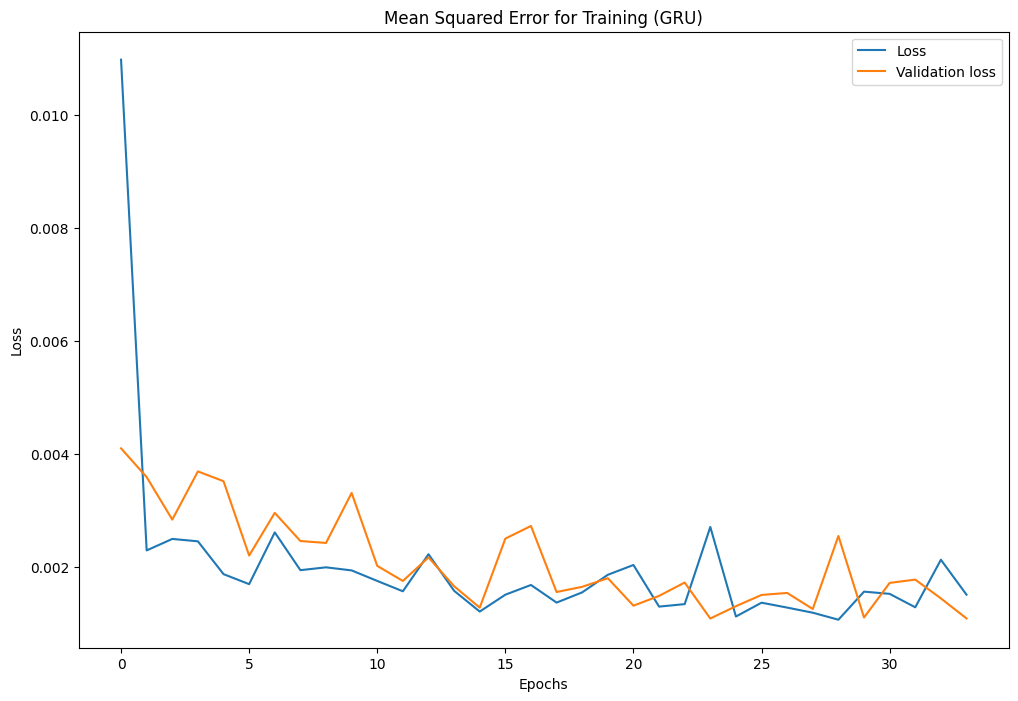

In [87]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (GRU)")

In [88]:
gru_model_dropout.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 13ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0231 - root_mean_squared_error: 0.0331


[0.0010926804970949888,
 0.0010926804970949888,
 0.023141061887145042,
 0.03305571898818016]

In [89]:
# Now try to predict the training and test values.
training_predict = gru_model_dropout.predict(feature_training)
test_predict = gru_model_dropout.predict(feature_test)

12/12 [==============================] - 0s 10ms/step


In [90]:
# Restore the training and test datasets' original shapes.
training_result_gru = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_gru = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]   [1198.876220703125]
31    2017-12-10  [1184.8400991863457]   [1203.389892578125]
32    2017-12-11  [1224.1145485841962]  [1202.8900146484375]
33    2017-12-12  [1297.0276373650145]       [1211.59765625]
34    2017-12-13  [1324.4906040502817]  [1241.7188720703125]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]   [2497.907470703125]
1600  2022-03-28  [2733.5177311196053]    [2538.26318359375]
1601  2022-03-29  [2768.4794493421177]   [2570.887451171875]
1602  2022-03-30  [2759.4760758914417]   [2601.026123046875]
1603  2022-03-31   [2704.099092600401]   [2611.388427734375]

[1574 rows x 3 columns]


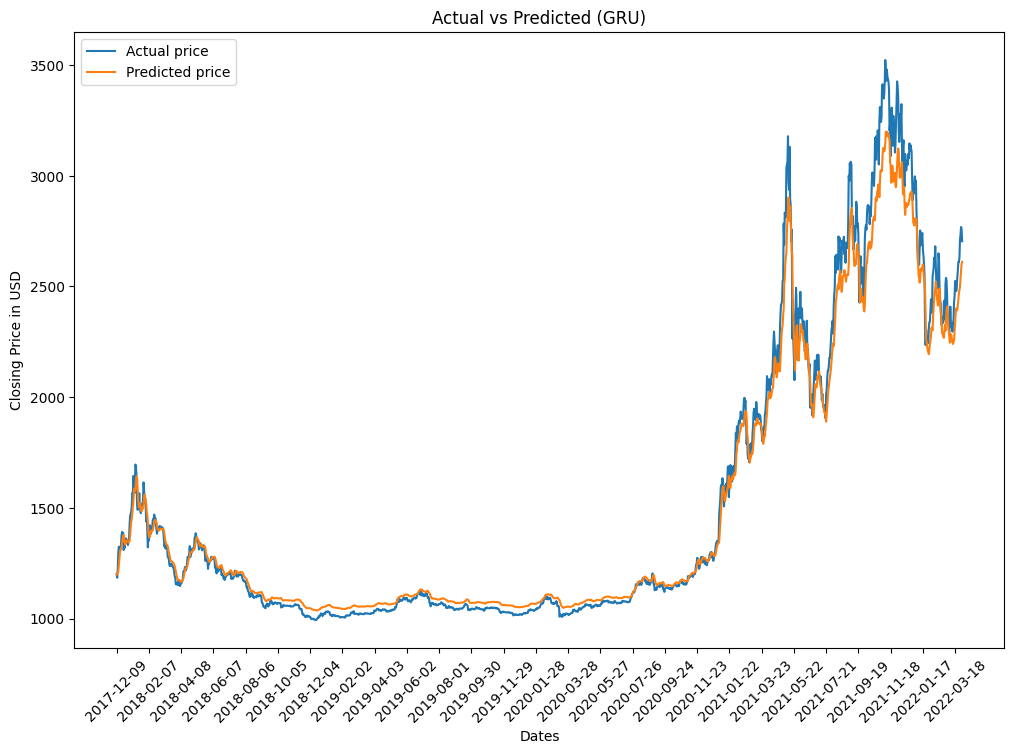

In [91]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_gru, original_data, "Actual vs Predicted (GRU)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]     [2650.6123046875]
1635  2022-05-02           [2857.4104]    [2664.65185546875]
1636  2022-05-03         [2783.476318]    [2690.09228515625]
1637  2022-05-04         [2940.644775]       [2666.58984375]
1638  2022-05-05         [2749.213135]   [2717.809326171875]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]  [1978.3599853515625]
1989  2023-04-21         [1849.999878]  [1937.0946044921875]
1990  2023-04-22  [1874.2286380000003]  [1883.5438232421875]
1991  2023-04-23         [1862.062012]   [1859.424560546875]
1992  2023-04-24         [1833.186401]   [1846.298095703125]

[359 rows x 3 columns]


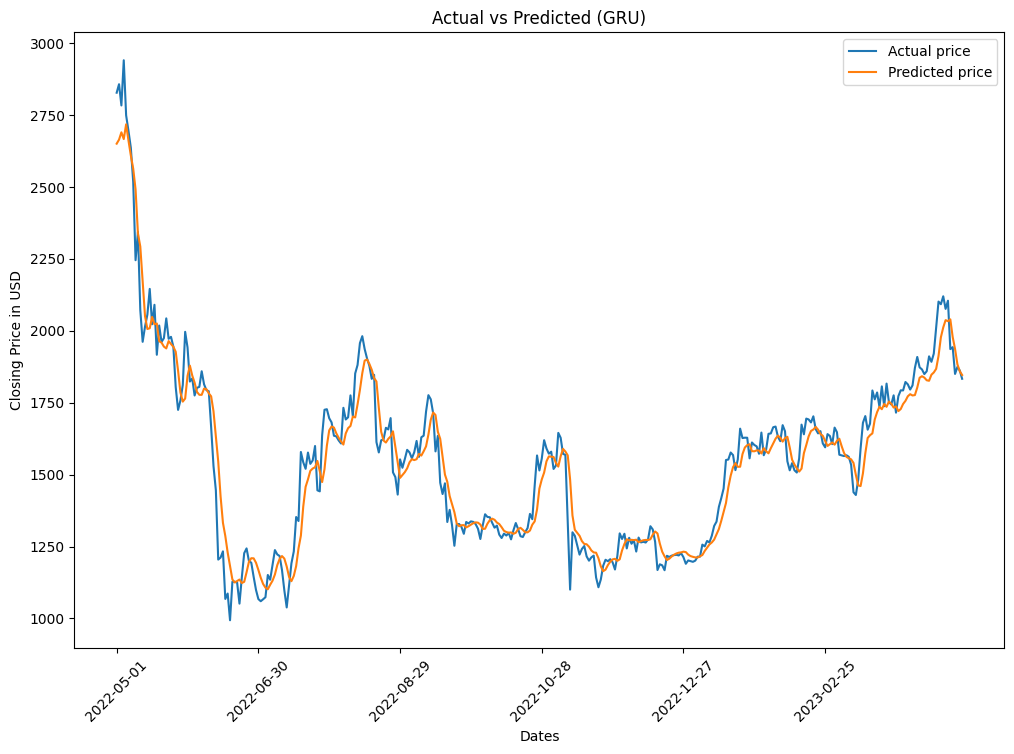

In [92]:
plot_result_test(label_test, test_result_gru, label_training.shape[0], original_data, "Actual vs Predicted (GRU)")

In [93]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

# Model with Regularizers

## Perceptron

In [94]:
perceptron_model_regularizers = tf.models.Sequential()
perceptron_model_regularizers.add(tf.layers.Input(shape=(num_steps,)))
perceptron_model_regularizers.add(tf.layers.Dense(128, activation='tanh', kernel_regularizer="l1_l2"))
perceptron_model_regularizers.add(tf.layers.Dense(128, activation='tanh'))
perceptron_model_regularizers.add(tf.layers.Dense(128, activation='tanh'))
perceptron_model_regularizers.add(tf.layers.Dense(128, activation='tanh'))
perceptron_model_regularizers.add(tf.layers.Dense(128, activation='tanh'))
perceptron_model_regularizers.add(tf.layers.Dense(1))
perceptron_model_regularizers.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                       metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])
perceptron_model_regularizers.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 70,145
Trainable params: 70,145
Non-traina

In [95]:
train_result = perceptron_model_regularizers.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 3s 14ms/step - loss: 3.5358 - mean_squared_error: 0.0331 - mean_absolute_error: 0.0853 - root_mean_squared_error: 0.1819 - val_loss: 2.7139 - val_mean_squared_error: 0.0084 - val_mean_absolute_error: 0.0681 - val_root_mean_squared_error: 0.0915
Epoch 2/100
50/50 [==============================] - 0s 9ms/step - loss: 2.0489 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0219 - root_mean_squared_error: 0.0376 - val_loss: 1.4177 - val_mean_squared_error: 0.0027 - val_mean_absolute_error: 0.0373 - val_root_mean_squared_error: 0.0517
Epoch 3/100
50/50 [==============================] - 0s 8ms/step - loss: 0.9687 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0185 - root_mean_squared_error: 0.0324 - val_loss: 0.5700 - val_mean_squared_error: 0.0034 - val_mean_absolute_error: 0.0407 - val_root_mean_squared_error: 0.0582
Epoch 4/100
50/50 [==============================] - 0s 9ms/step - loss: 0.3260 - mean_squared_error: 0.0011

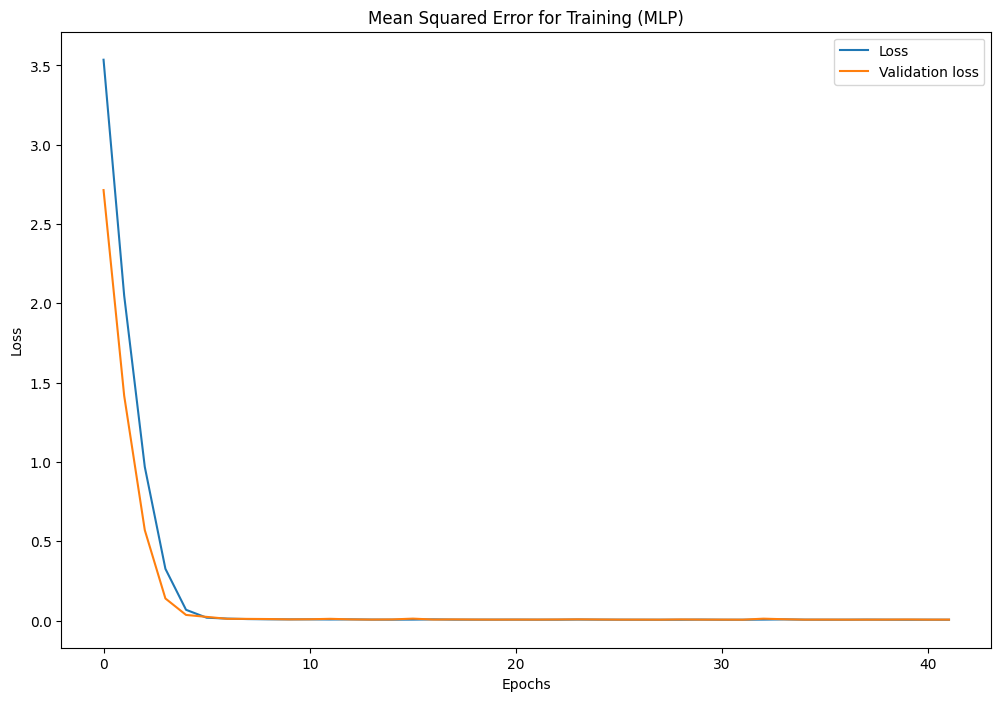

In [96]:
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (MLP)")

In [97]:
perceptron_model_regularizers.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 3ms/step - loss: 0.0053 - mean_squared_error: 7.4165e-04 - mean_absolute_error: 0.0190 - root_mean_squared_error: 0.0272


[0.0052891867235302925,
 0.0007416521548293531,
 0.019010482355952263,
 0.027233291417360306]

In [98]:
# Now try to predict the training and test values.
training_predict = perceptron_model_regularizers.predict(feature_training)
test_predict = perceptron_model_regularizers.predict(feature_test)

12/12 [==============================] - 0s 2ms/step


In [99]:
# Restore the training and test datasets' original shapes.
training_result_mlp = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_mlp = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]  [1198.7838134765625]
31    2017-12-10  [1184.8400991863457]   [1208.265380859375]
32    2017-12-11  [1224.1145485841962]        [1197.6171875]
33    2017-12-12  [1297.0276373650145]  [1223.0089111328125]
34    2017-12-13  [1324.4906040502817]  [1285.7523193359375]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]   [2545.475830078125]
1600  2022-03-28  [2733.5177311196053]   [2607.836669921875]
1601  2022-03-29  [2768.4794493421177]     [2642.6025390625]
1602  2022-03-30  [2759.4760758914417]   [2672.993408203125]
1603  2022-03-31   [2704.099092600401]   [2674.041748046875]

[1574 rows x 3 columns]


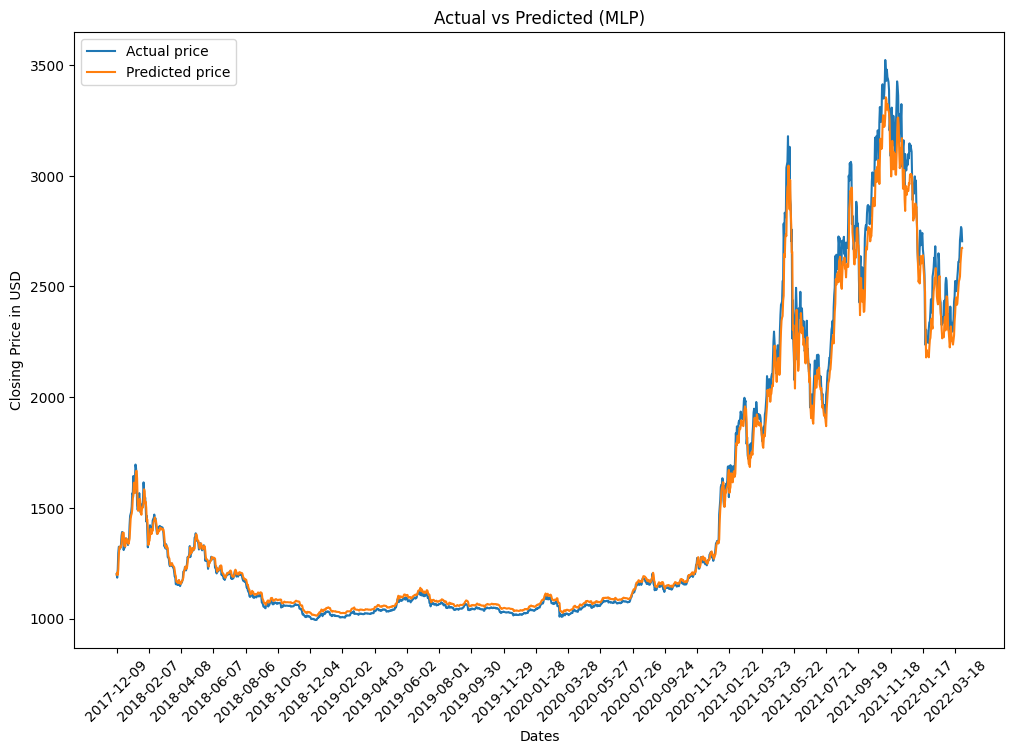

In [100]:
plot_result_train(label_training, training_result_mlp, original_data, "Actual vs Predicted (MLP)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]    [2645.17529296875]
1635  2022-05-02           [2857.4104]    [2698.87158203125]
1636  2022-05-03         [2783.476318]    [2742.24951171875]
1637  2022-05-04         [2940.644775]   [2695.217529296875]
1638  2022-05-05         [2749.213135]   [2795.504150390625]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]     [1936.8232421875]
1989  2023-04-21         [1849.999878]    [1904.99462890625]
1990  2023-04-22  [1874.2286380000003]  [1836.9114990234375]
1991  2023-04-23         [1862.062012]  [1834.7669677734375]
1992  2023-04-24         [1833.186401]   [1830.844970703125]

[359 rows x 3 columns]


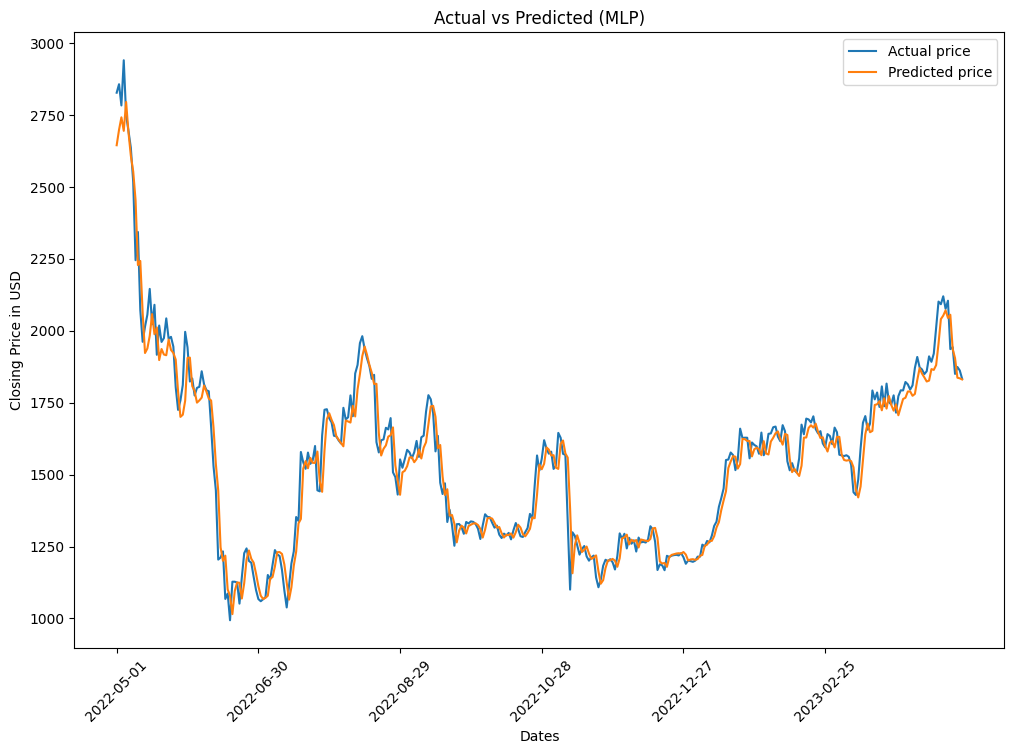

In [101]:
plot_result_test(label_test, test_result_mlp, label_training.shape[0], original_data, "Actual vs Predicted (MLP)")

In [102]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## 1-D Convolutional

In [103]:
cnn_model_regularizers = tf.models.Sequential()
cnn_model_regularizers.add(tf.layers.Conv1D(filters=30, kernel_size=3, activation='relu', kernel_regularizer="l1_l2", input_shape=(num_steps, 1)))
cnn_model_regularizers.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn_model_regularizers.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn_model_regularizers.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn_model_regularizers.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn_model_regularizers.add(tf.layers.AveragePooling1D())
cnn_model_regularizers.add(tf.layers.Flatten()) # Don't forget to flatten the Conv1D layers.
cnn_model_regularizers.add(tf.layers.Dense(1))
cnn_model_regularizers.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                       metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])
cnn_model_regularizers.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 30)            120       
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 30)            2730      
                                                                 
 conv1d_2 (Conv1D)           (None, 24, 30)            2730      
                                                                 
 conv1d_3 (Conv1D)           (None, 22, 30)            2730      
                                                                 
 conv1d_4 (Conv1D)           (None, 20, 30)            2730      
                                                                 
 average_pooling1d (AverageP  (None, 10, 30)           0         
 ooling1D)                                                       
                                                        

In [104]:
train_result = cnn_model_regularizers.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 3s 11ms/step - loss: 0.1152 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0467 - root_mean_squared_error: 0.0823 - val_loss: 0.0962 - val_mean_squared_error: 0.0091 - val_mean_absolute_error: 0.0685 - val_root_mean_squared_error: 0.0956
Epoch 2/100
50/50 [==============================] - 0s 6ms/step - loss: 0.0716 - mean_squared_error: 0.0023 - mean_absolute_error: 0.0275 - root_mean_squared_error: 0.0476 - val_loss: 0.0571 - val_mean_squared_error: 0.0052 - val_mean_absolute_error: 0.0511 - val_root_mean_squared_error: 0.0723
Epoch 3/100
50/50 [==============================] - 0s 7ms/step - loss: 0.0407 - mean_squared_error: 0.0019 - mean_absolute_error: 0.0262 - root_mean_squared_error: 0.0441 - val_loss: 0.0311 - val_mean_squared_error: 0.0046 - val_mean_absolute_error: 0.0488 - val_root_mean_squared_error: 0.0677
Epoch 4/100
50/50 [==============================] - 0s 7ms/step - loss: 0.0215 - mean_squared_error: 0.0024

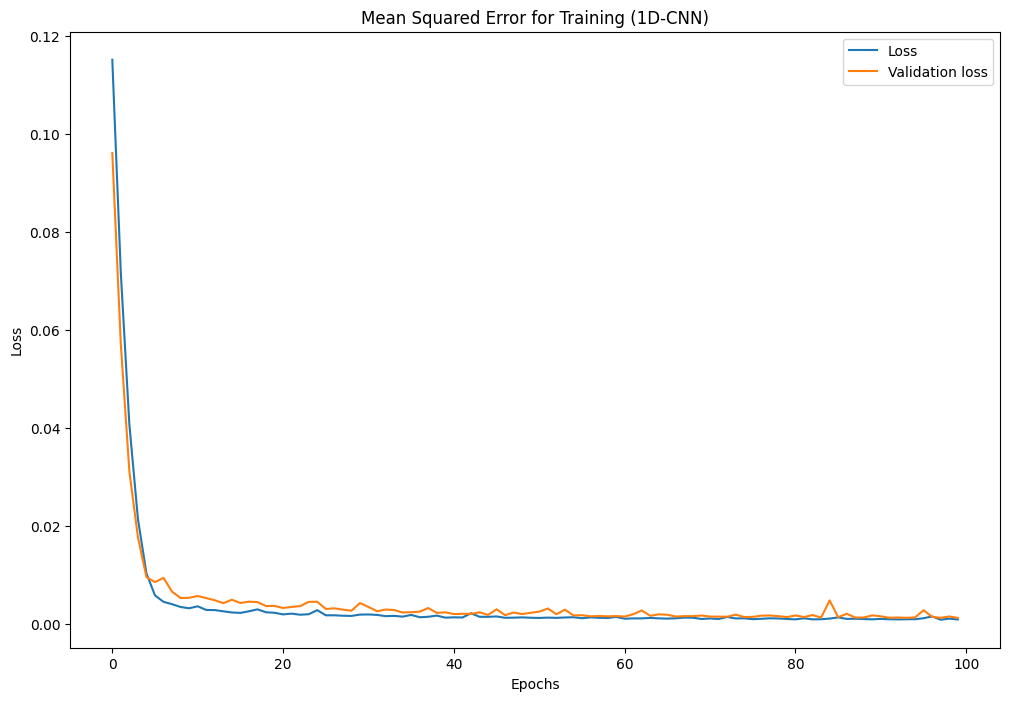

In [105]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (1D-CNN)")

In [106]:
cnn_model_regularizers.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 3ms/step - loss: 0.0012 - mean_squared_error: 7.6236e-04 - mean_absolute_error: 0.0196 - root_mean_squared_error: 0.0276


[0.001235690084286034,
 0.0007623592391610146,
 0.019611027091741562,
 0.02761085331439972]

In [107]:
# Now try to predict the training and test values.
training_predict = cnn_model_regularizers.predict(feature_training)
test_predict = cnn_model_regularizers.predict(feature_test)

12/12 [==============================] - 0s 3ms/step


In [108]:
# Restore the training and test datasets' original shapes.
training_result_cnn = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_cnn = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]   [1184.774658203125]
31    2017-12-10  [1184.8400991863457]  [1197.9361572265625]
32    2017-12-11  [1224.1145485841962]       [1188.11328125]
33    2017-12-12  [1297.0276373650145]     [1204.8173828125]
34    2017-12-13  [1324.4906040502817]      [1281.134765625]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]     [2585.3544921875]
1600  2022-03-28  [2733.5177311196053]   [2659.402587890625]
1601  2022-03-29  [2768.4794493421177]     [2699.7451171875]
1602  2022-03-30  [2759.4760758914417]     [2727.6435546875]
1603  2022-03-31   [2704.099092600401]       [2738.28515625]

[1574 rows x 3 columns]


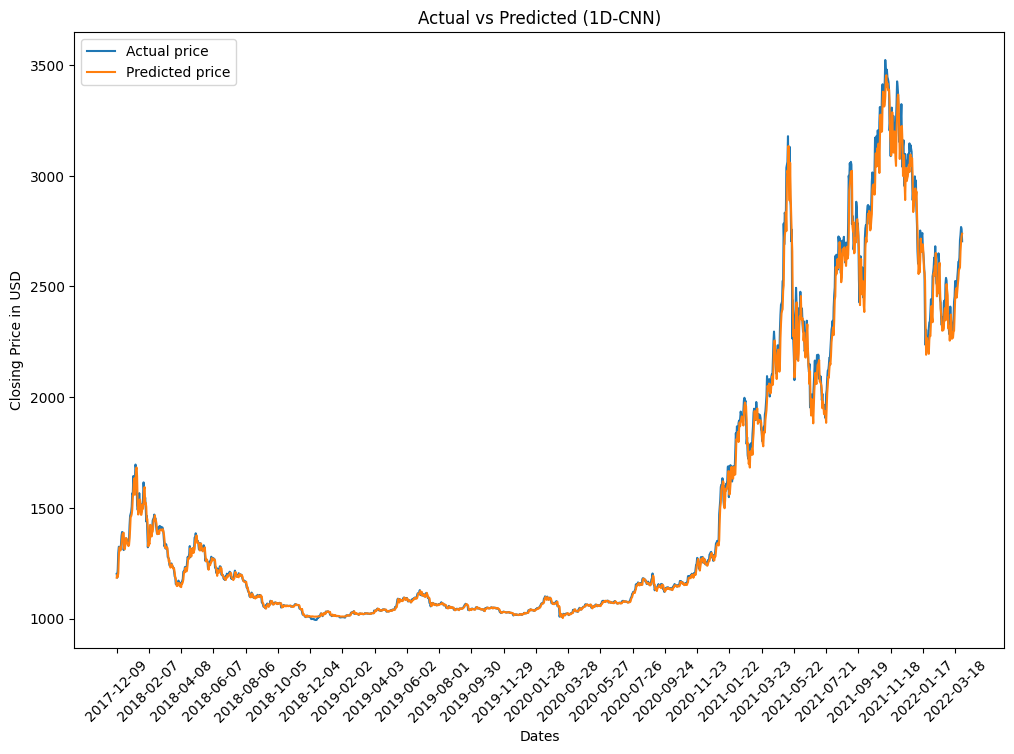

In [109]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_cnn, original_data, "Actual vs Predicted (1D-CNN)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]   [2704.721923828125]
1635  2022-05-02           [2857.4104]    [2738.48876953125]
1636  2022-05-03         [2783.476318]   [2808.552978515625]
1637  2022-05-04         [2940.644775]   [2757.766357421875]
1638  2022-05-05         [2749.213135]   [2844.303955078125]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]  [1965.8016357421875]
1989  2023-04-21         [1849.999878]  [1893.4412841796875]
1990  2023-04-22  [1874.2286380000003]  [1873.6947021484375]
1991  2023-04-23         [1862.062012]   [1833.899658203125]
1992  2023-04-24         [1833.186401]  [1866.2501220703125]

[359 rows x 3 columns]


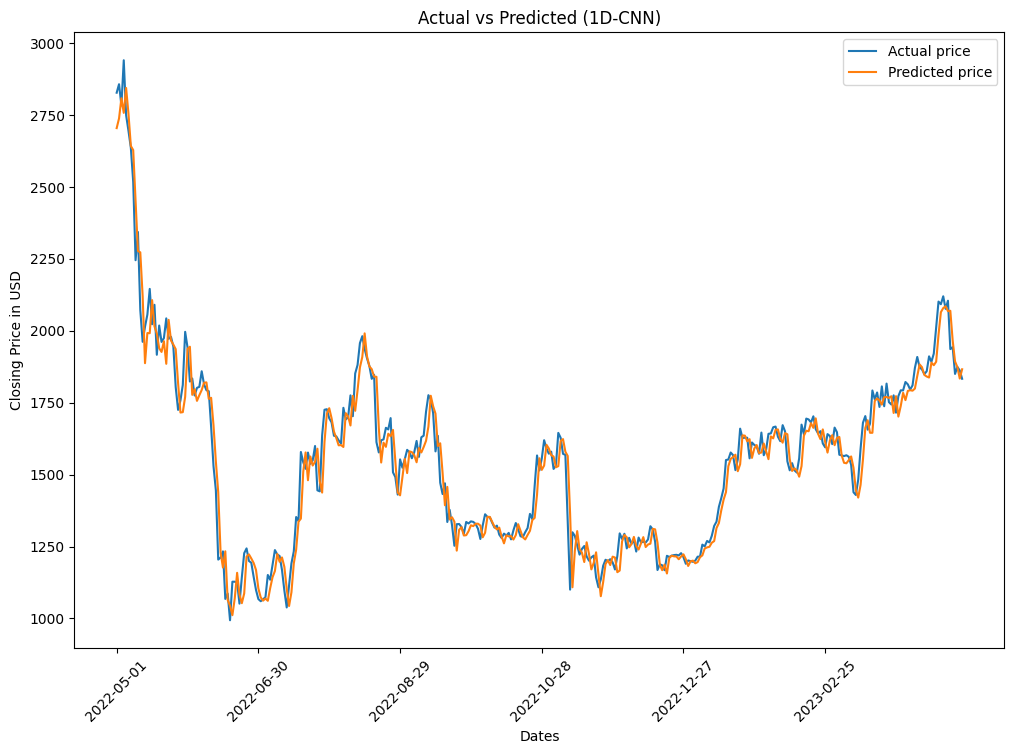

In [110]:
plot_result_test(label_test, test_result_cnn, label_training.shape[0], original_data, "Actual vs Predicted (1D-CNN)")

In [111]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## LSTM

In [112]:
lstm_model_regularizers = tf.models.Sequential()
lstm_model_regularizers.add(tf.layers.LSTM(units=128, activation='relu', kernel_regularizer="l1_l2", input_shape=(num_steps, 1), return_sequences=True))
lstm_model_regularizers.add(tf.layers.LSTM(units=128, return_sequences=True))
lstm_model_regularizers.add(tf.layers.LSTM(units=128, return_sequences=True))
lstm_model_regularizers.add(tf.layers.LSTM(units=128, return_sequences=True))
lstm_model_regularizers.add(tf.layers.LSTM(units=128))
lstm_model_regularizers.add(tf.layers.Dense(1))
lstm_model_regularizers.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                       metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])
lstm_model_regularizers.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           131584    
                                                                 
 lstm_2 (LSTM)               (None, 30, 128)           131584    
                                                                 
 lstm_3 (LSTM)               (None, 30, 128)           131584    
                                                                 
 lstm_4 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 593,025
Trainable params: 593,025
Non-trai

In [113]:
train_result = lstm_model_regularizers.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 13s 91ms/step - loss: 0.1986 - mean_squared_error: 0.0133 - mean_absolute_error: 0.0692 - root_mean_squared_error: 0.1153 - val_loss: 0.1170 - val_mean_squared_error: 0.0241 - val_mean_absolute_error: 0.1162 - val_root_mean_squared_error: 0.1553
Epoch 2/100
50/50 [==============================] - 3s 66ms/step - loss: 0.0481 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0404 - root_mean_squared_error: 0.0622 - val_loss: 0.0266 - val_mean_squared_error: 0.0142 - val_mean_absolute_error: 0.0904 - val_root_mean_squared_error: 0.1193
Epoch 3/100
50/50 [==============================] - 5s 97ms/step - loss: 0.0116 - mean_squared_error: 0.0046 - mean_absolute_error: 0.0465 - root_mean_squared_error: 0.0677 - val_loss: 0.0155 - val_mean_squared_error: 0.0110 - val_mean_absolute_error: 0.0808 - val_root_mean_squared_error: 0.1050
Epoch 4/100
50/50 [==============================] - 3s 65ms/step - loss: 0.0098 - mean_squared_error: 0.

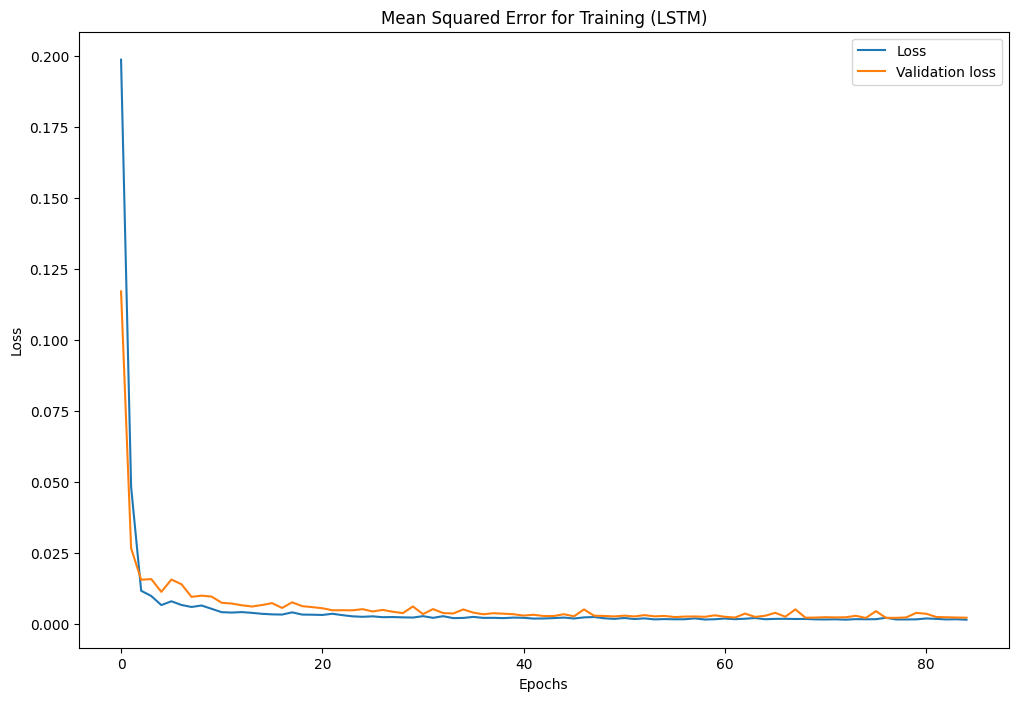

In [114]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (LSTM)")

In [115]:
lstm_model_regularizers.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 17ms/step - loss: 0.0021 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0228 - root_mean_squared_error: 0.0328


[0.002054851967841387,
 0.0010755297262221575,
 0.02283952198922634,
 0.032795269042253494]

In [116]:
# Now try to predict the training and test values.
training_predict = lstm_model_regularizers.predict(feature_training)
test_predict = lstm_model_regularizers.predict(feature_test)

12/12 [==============================] - 0s 9ms/step


In [117]:
# Restore the training and test datasets' original shapes.
training_result_lstm = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_lstm = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]    [1187.87744140625]
31    2017-12-10  [1184.8400991863457]    [1190.81884765625]
32    2017-12-11  [1224.1145485841962]  [1193.3392333984375]
33    2017-12-12  [1297.0276373650145]  [1199.7086181640625]
34    2017-12-13  [1324.4906040502817]    [1222.45458984375]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]    [2571.24267578125]
1600  2022-03-28  [2733.5177311196053]   [2634.684326171875]
1601  2022-03-29  [2768.4794493421177]    [2667.90673828125]
1602  2022-03-30  [2759.4760758914417]       [2694.66796875]
1603  2022-03-31   [2704.099092600401]   [2694.162353515625]

[1574 rows x 3 columns]


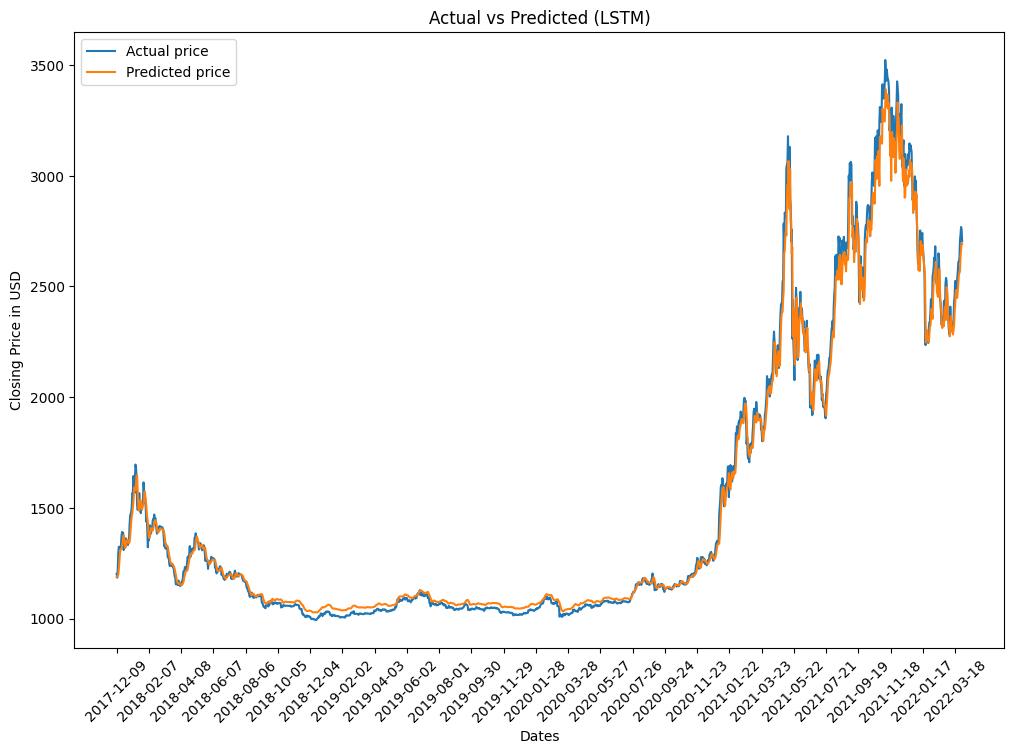

In [118]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_lstm, original_data, "Actual vs Predicted (LSTM)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]   [2708.628173828125]
1635  2022-05-02           [2857.4104]   [2772.759033203125]
1636  2022-05-03         [2783.476318]   [2800.343505859375]
1637  2022-05-04         [2940.644775]   [2738.348876953125]
1638  2022-05-05         [2749.213135]     [2871.1533203125]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]       [1982.22265625]
1989  2023-04-21         [1849.999878]  [1925.5745849609375]
1990  2023-04-22  [1874.2286380000003]     [1874.8583984375]
1991  2023-04-23         [1862.062012]  [1861.8167724609375]
1992  2023-04-24         [1833.186401]    [1865.53076171875]

[359 rows x 3 columns]


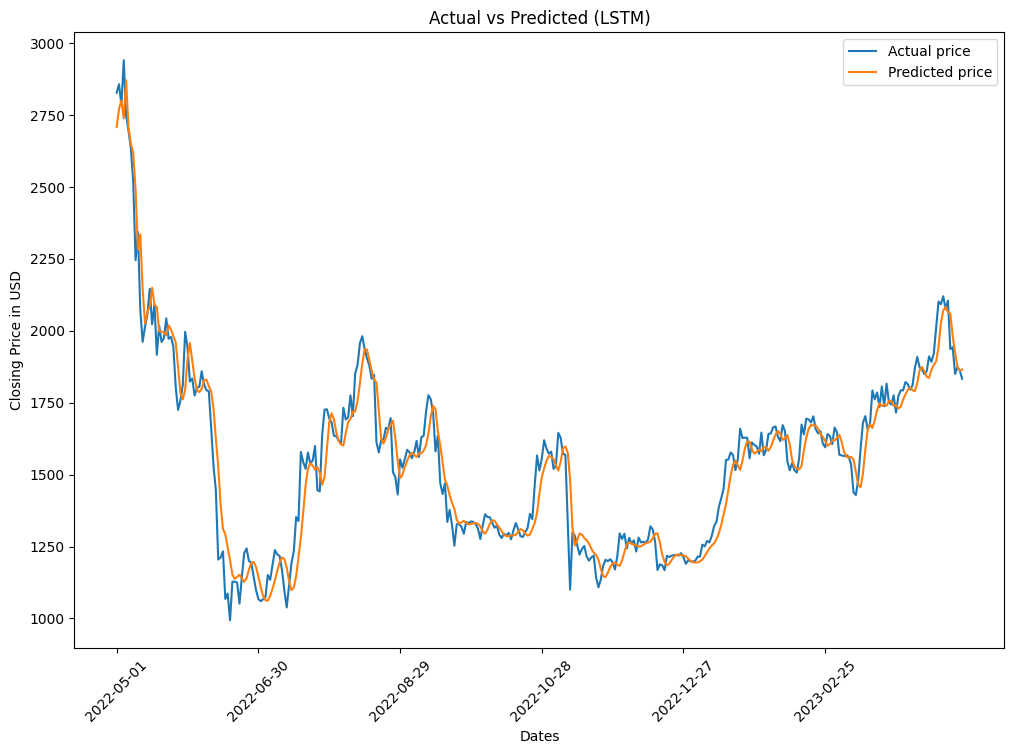

In [119]:
plot_result_test(label_test, test_result_lstm, label_training.shape[0], original_data, "Actual vs Predicted (LSTM)")

In [120]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## GRU

In [121]:
gru_model_regularizers = tf.models.Sequential()
gru_model_regularizers.add(tf.layers.GRU(units=128, activation='relu', kernel_regularizer="l1_l2", input_shape=(num_steps, 1), return_sequences=True))
gru_model_regularizers.add(tf.layers.GRU(units=128, return_sequences=True))
gru_model_regularizers.add(tf.layers.GRU(units=128, return_sequences=True))
gru_model_regularizers.add(tf.layers.GRU(units=128, return_sequences=True))
gru_model_regularizers.add(tf.layers.GRU(units=128))
gru_model_regularizers.add(tf.layers.Dense(1))
gru_model_regularizers.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                       metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])
gru_model_regularizers.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 128)           50304     
                                                                 
 gru_1 (GRU)                 (None, 30, 128)           99072     
                                                                 
 gru_2 (GRU)                 (None, 30, 128)           99072     
                                                                 
 gru_3 (GRU)                 (None, 30, 128)           99072     
                                                                 
 gru_4 (GRU)                 (None, 128)               99072     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 446,721
Trainable params: 446,721
Non-trai

In [122]:
train_result = gru_model_regularizers.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 17s 133ms/step - loss: 0.1924 - mean_squared_error: 0.0130 - mean_absolute_error: 0.0638 - root_mean_squared_error: 0.1142 - val_loss: 0.1112 - val_mean_squared_error: 0.0086 - val_mean_absolute_error: 0.0691 - val_root_mean_squared_error: 0.0925
Epoch 2/100
50/50 [==============================] - 5s 91ms/step - loss: 0.0594 - mean_squared_error: 0.0022 - mean_absolute_error: 0.0299 - root_mean_squared_error: 0.0466 - val_loss: 0.0271 - val_mean_squared_error: 0.0055 - val_mean_absolute_error: 0.0514 - val_root_mean_squared_error: 0.0743
Epoch 3/100
50/50 [==============================] - 5s 99ms/step - loss: 0.0121 - mean_squared_error: 0.0021 - mean_absolute_error: 0.0324 - root_mean_squared_error: 0.0463 - val_loss: 0.0085 - val_mean_squared_error: 0.0038 - val_mean_absolute_error: 0.0467 - val_root_mean_squared_error: 0.0620
Epoch 4/100
50/50 [==============================] - 4s 79ms/step - loss: 0.0070 - mean_squared_error: 0

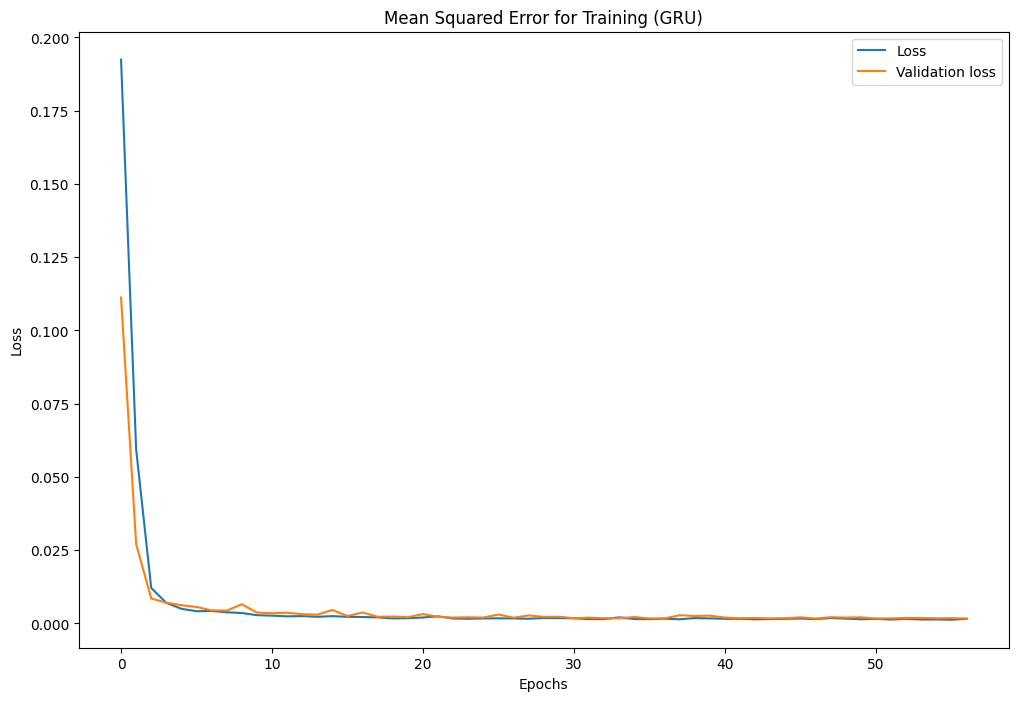

In [123]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (GRU)")

In [124]:
gru_model_regularizers.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 13ms/step - loss: 0.0017 - mean_squared_error: 7.4536e-04 - mean_absolute_error: 0.0189 - root_mean_squared_error: 0.0273


[0.0016750770155340433,
 0.0007453610887750983,
 0.01885656826198101,
 0.027301302179694176]

In [125]:
# Now try to predict the training and test values.
training_predict = gru_model_regularizers.predict(feature_training)
test_predict = gru_model_regularizers.predict(feature_test)

12/12 [==============================] - 0s 12ms/step


In [126]:
# Restore the training and test datasets' original shapes.
training_result_gru = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_gru = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]  [1203.0267333984375]
31    2017-12-10  [1184.8400991863457]   [1212.537353515625]
32    2017-12-11  [1224.1145485841962]   [1203.539794921875]
33    2017-12-12  [1297.0276373650145]  [1227.0357666015625]
34    2017-12-13  [1324.4906040502817]  [1286.6453857421875]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]   [2613.564208984375]
1600  2022-03-28  [2733.5177311196053]    [2688.17041015625]
1601  2022-03-29  [2768.4794493421177]   [2712.780517578125]
1602  2022-03-30  [2759.4760758914417]      [2747.724609375]
1603  2022-03-31   [2704.099092600401]   [2738.591552734375]

[1574 rows x 3 columns]


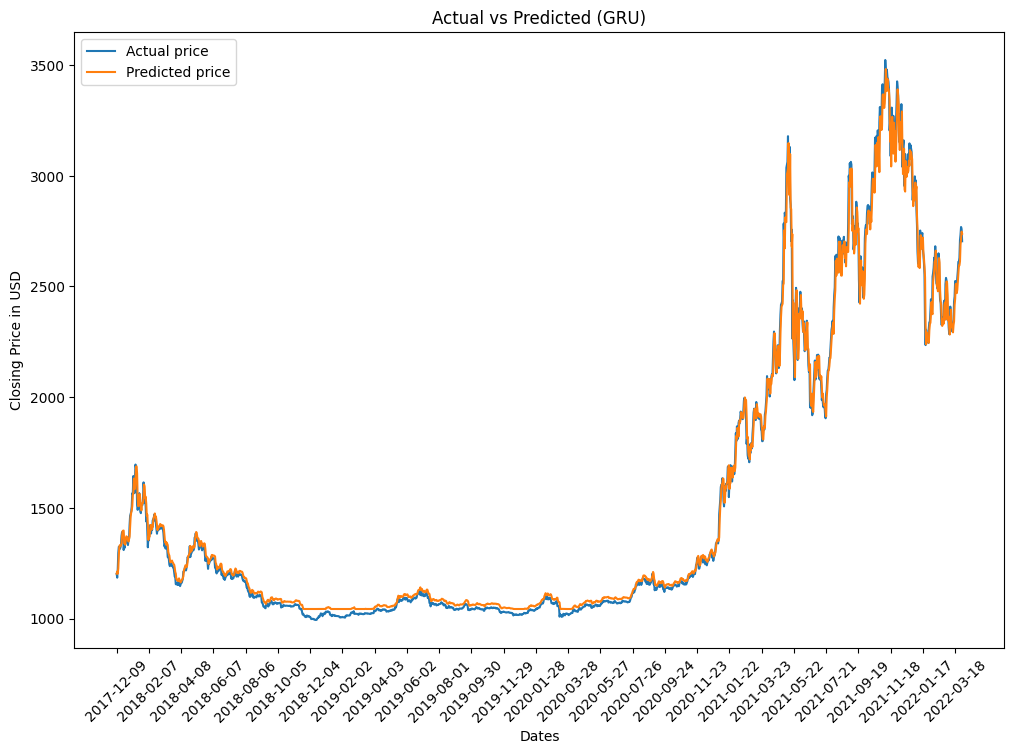

In [127]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_gru, original_data, "Actual vs Predicted (GRU)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]     [2712.4326171875]
1635  2022-05-02           [2857.4104]   [2803.571044921875]
1636  2022-05-03         [2783.476318]   [2830.730224609375]
1637  2022-05-04         [2940.644775]         [2762.765625]
1638  2022-05-05         [2749.213135]    [2916.28564453125]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]    [1960.26416015625]
1989  2023-04-21         [1849.999878]  [1948.3739013671875]
1990  2023-04-22  [1874.2286380000003]  [1868.1827392578125]
1991  2023-04-23         [1862.062012]  [1877.2222900390625]
1992  2023-04-24         [1833.186401]   [1869.510009765625]

[359 rows x 3 columns]


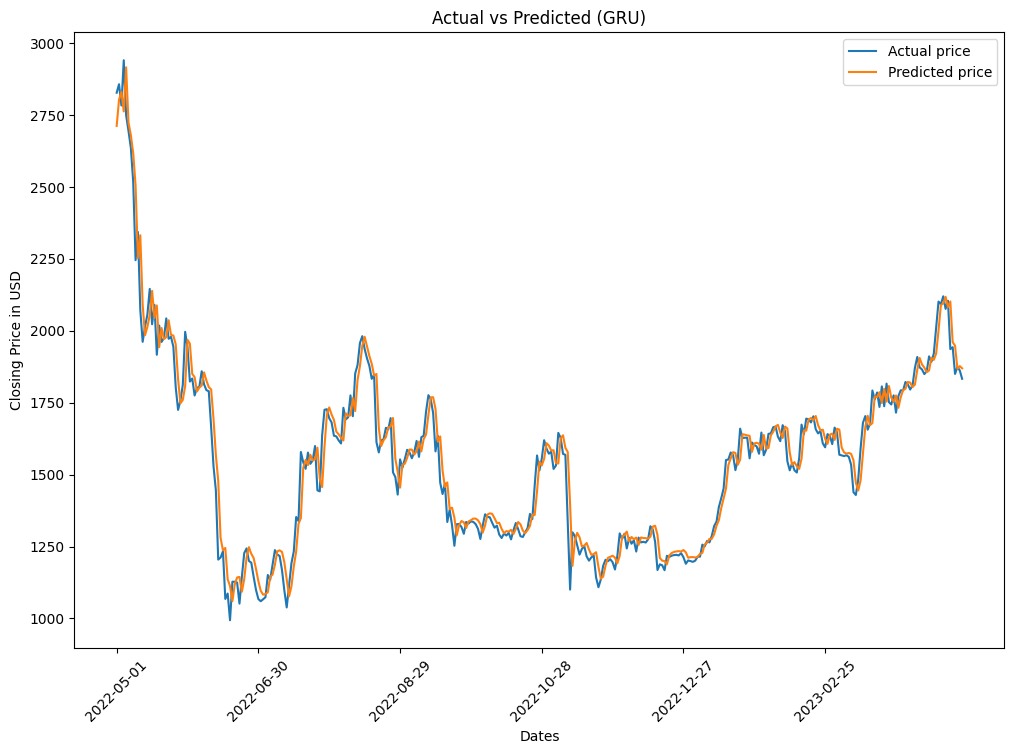

In [128]:
plot_result_test(label_test, test_result_gru, label_training.shape[0], original_data, "Actual vs Predicted (GRU)")

In [129]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

# Model with Dropout and Regularizers

## Perceptron

In [130]:
perceptron_model_dropout_regularizers = tf.models.Sequential()
perceptron_model_dropout_regularizers.add(tf.layers.Input(shape=(num_steps,)))
perceptron_model_dropout_regularizers.add(tf.layers.Dense(128, activation='tanh', kernel_regularizer="l1_l2"))
perceptron_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
perceptron_model_dropout_regularizers.add(tf.layers.Dense(128, activation='tanh'))
perceptron_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
perceptron_model_dropout_regularizers.add(tf.layers.Dense(128, activation='tanh'))
perceptron_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
perceptron_model_dropout_regularizers.add(tf.layers.Dense(128, activation='tanh'))
perceptron_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
perceptron_model_dropout_regularizers.add(tf.layers.Dense(128, activation='tanh'))
perceptron_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
perceptron_model_dropout_regularizers.add(tf.layers.Dense(1))
perceptron_model_dropout_regularizers.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                       metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])
perceptron_model_dropout_regularizers.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               1

In [131]:
train_result = perceptron_model_dropout_regularizers.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 4s 14ms/step - loss: 3.4633 - mean_squared_error: 0.0416 - mean_absolute_error: 0.1134 - root_mean_squared_error: 0.2040 - val_loss: 2.5729 - val_mean_squared_error: 0.0271 - val_mean_absolute_error: 0.1317 - val_root_mean_squared_error: 0.1646
Epoch 2/100
50/50 [==============================] - 0s 9ms/step - loss: 1.8938 - mean_squared_error: 0.0140 - mean_absolute_error: 0.0650 - root_mean_squared_error: 0.1183 - val_loss: 1.2507 - val_mean_squared_error: 0.0036 - val_mean_absolute_error: 0.0445 - val_root_mean_squared_error: 0.0600
Epoch 3/100
50/50 [==============================] - 0s 9ms/step - loss: 0.8241 - mean_squared_error: 0.0062 - mean_absolute_error: 0.0456 - root_mean_squared_error: 0.0789 - val_loss: 0.4450 - val_mean_squared_error: 0.0064 - val_mean_absolute_error: 0.0578 - val_root_mean_squared_error: 0.0801
Epoch 4/100
50/50 [==============================] - 0s 9ms/step - loss: 0.2300 - mean_squared_error: 0.0047

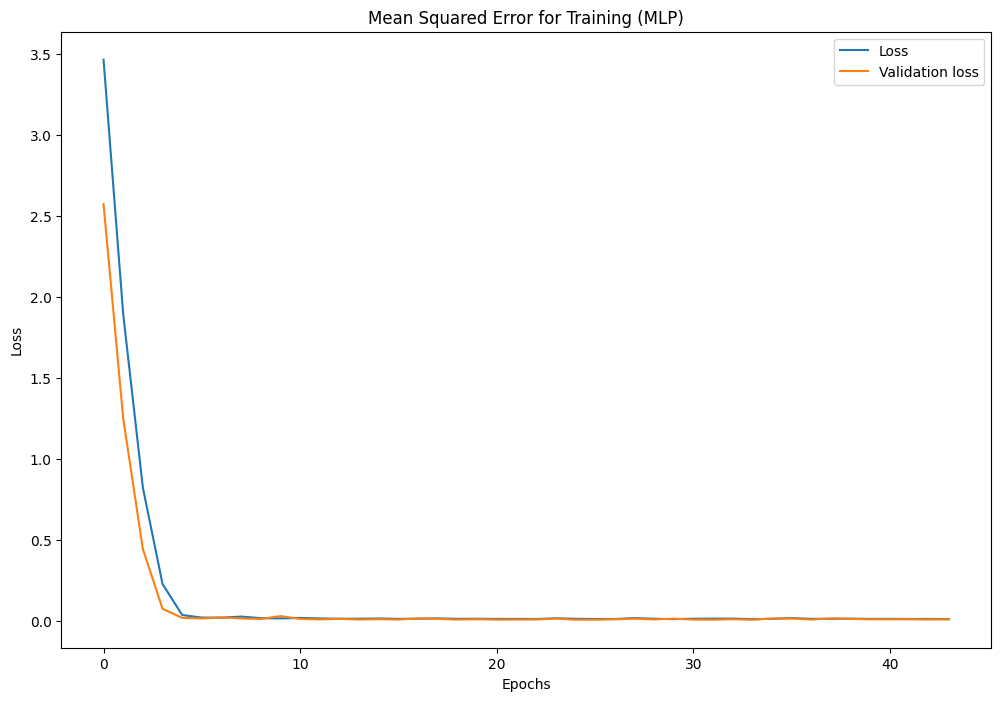

In [132]:
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (MLP)")

In [133]:
perceptron_model_dropout_regularizers.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 3ms/step - loss: 0.0096 - mean_squared_error: 9.9820e-04 - mean_absolute_error: 0.0230 - root_mean_squared_error: 0.0316


[0.009594450704753399,
 0.000998202944174409,
 0.02302580140531063,
 0.031594350934028625]

In [134]:
# Now try to predict the training and test values.
training_predict = perceptron_model_dropout_regularizers.predict(feature_training)
test_predict = perceptron_model_dropout_regularizers.predict(feature_test)

12/12 [==============================] - 0s 2ms/step


In [135]:
# Restore the training and test datasets' original shapes.
training_result_mlp = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_mlp = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]   [1202.365478515625]
31    2017-12-10  [1184.8400991863457]  [1209.9459228515625]
32    2017-12-11  [1224.1145485841962]  [1202.6427001953125]
33    2017-12-12  [1297.0276373650145]  [1221.9388427734375]
34    2017-12-13  [1324.4906040502817]    [1270.13037109375]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]       [2471.16796875]
1600  2022-03-28  [2733.5177311196053]   [2520.838134765625]
1601  2022-03-29  [2768.4794493421177]          [2550.90625]
1602  2022-03-30  [2759.4760758914417]   [2579.032470703125]
1603  2022-03-31   [2704.099092600401]          [2584.15625]

[1574 rows x 3 columns]


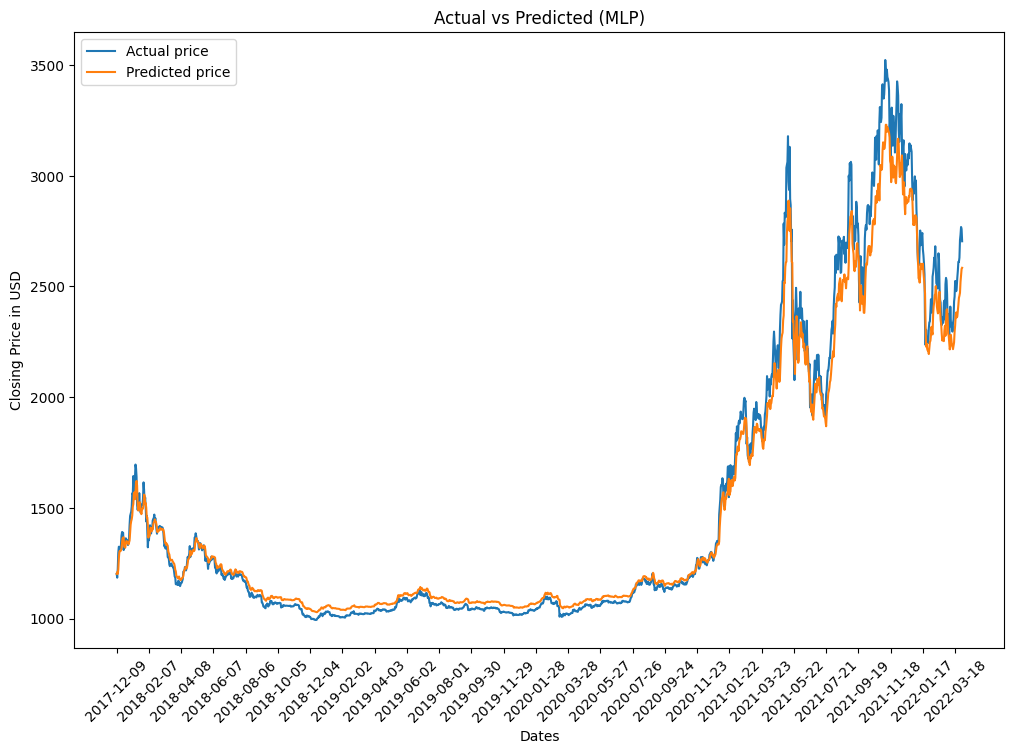

In [136]:
plot_result_train(label_training, training_result_mlp, original_data, "Actual vs Predicted (MLP)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]      [2642.724609375]
1635  2022-05-02           [2857.4104]     [2677.2197265625]
1636  2022-05-03         [2783.476318]   [2706.718017578125]
1637  2022-05-04         [2940.644775]     [2670.6142578125]
1638  2022-05-05         [2749.213135]   [2743.338134765625]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]  [1911.4444580078125]
1989  2023-04-21         [1849.999878]   [1885.782958984375]
1990  2023-04-22  [1874.2286380000003]  [1831.9061279296875]
1991  2023-04-23         [1862.062012]   [1826.773681640625]
1992  2023-04-24         [1833.186401]       [1821.69921875]

[359 rows x 3 columns]


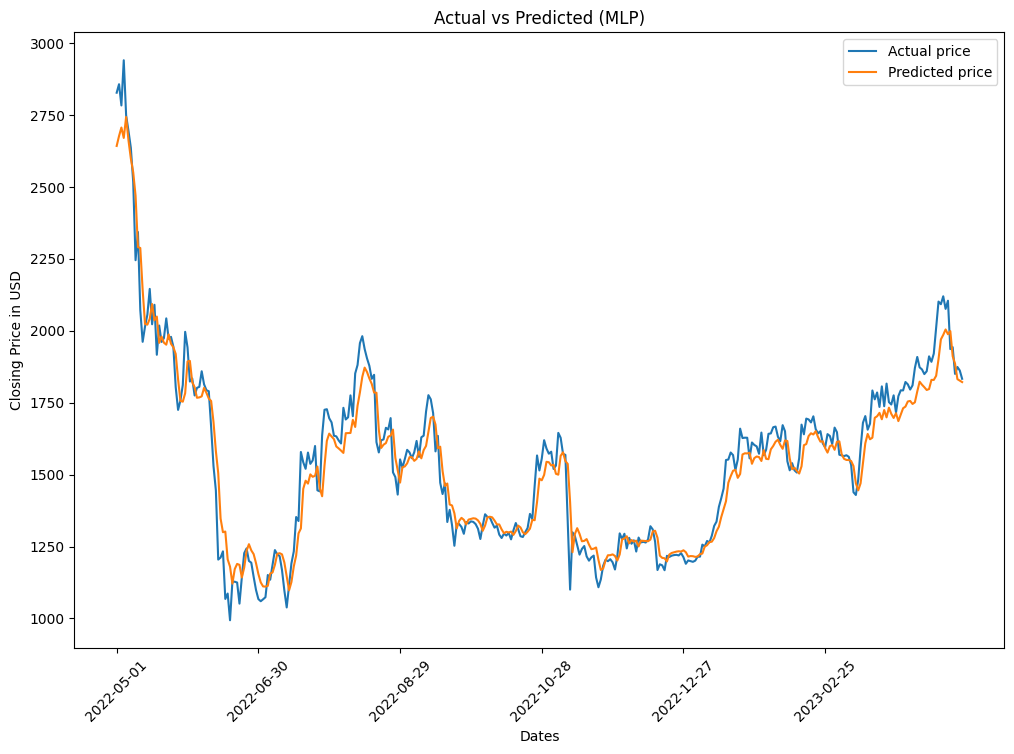

In [137]:
plot_result_test(label_test, test_result_mlp, label_training.shape[0], original_data, "Actual vs Predicted (MLP)")

In [138]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## 1-D Convolutional

In [139]:
cnn_model_dropout_regularizers = tf.models.Sequential()
cnn_model_dropout_regularizers.add(tf.layers.Conv1D(filters=30, kernel_size=3, activation='relu', kernel_regularizer="l1_l2", input_shape=(num_steps, 1)))
cnn_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
cnn_model_dropout_regularizers.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
cnn_model_dropout_regularizers.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
cnn_model_dropout_regularizers.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
cnn_model_dropout_regularizers.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
cnn_model_dropout_regularizers.add(tf.layers.AveragePooling1D())
cnn_model_dropout_regularizers.add(tf.layers.Flatten()) # Don't forget to flatten the Conv1D layers.
cnn_model_dropout_regularizers.add(tf.layers.Dense(1))
cnn_model_dropout_regularizers.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                       metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])
cnn_model_dropout_regularizers.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 30)            120       
                                                                 
 dropout (Dropout)           (None, 28, 30)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 30)            2730      
                                                                 
 dropout_1 (Dropout)         (None, 26, 30)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 24, 30)            2730      
                                                                 
 dropout_2 (Dropout)         (None, 24, 30)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 22, 30)            2

In [140]:
train_result = cnn_model_dropout_regularizers.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 3s 12ms/step - loss: 0.1373 - mean_squared_error: 0.0171 - mean_absolute_error: 0.0751 - root_mean_squared_error: 0.1307 - val_loss: 0.1173 - val_mean_squared_error: 0.0166 - val_mean_absolute_error: 0.0927 - val_root_mean_squared_error: 0.1287
Epoch 2/100
50/50 [==============================] - 0s 8ms/step - loss: 0.0903 - mean_squared_error: 0.0061 - mean_absolute_error: 0.0458 - root_mean_squared_error: 0.0783 - val_loss: 0.0752 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0669 - val_root_mean_squared_error: 0.0866
Epoch 3/100
50/50 [==============================] - 0s 8ms/step - loss: 0.0609 - mean_squared_error: 0.0058 - mean_absolute_error: 0.0444 - root_mean_squared_error: 0.0759 - val_loss: 0.0502 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0686 - val_root_mean_squared_error: 0.0876
Epoch 4/100
50/50 [==============================] - 0s 7ms/step - loss: 0.0377 - mean_squared_error: 0.0046

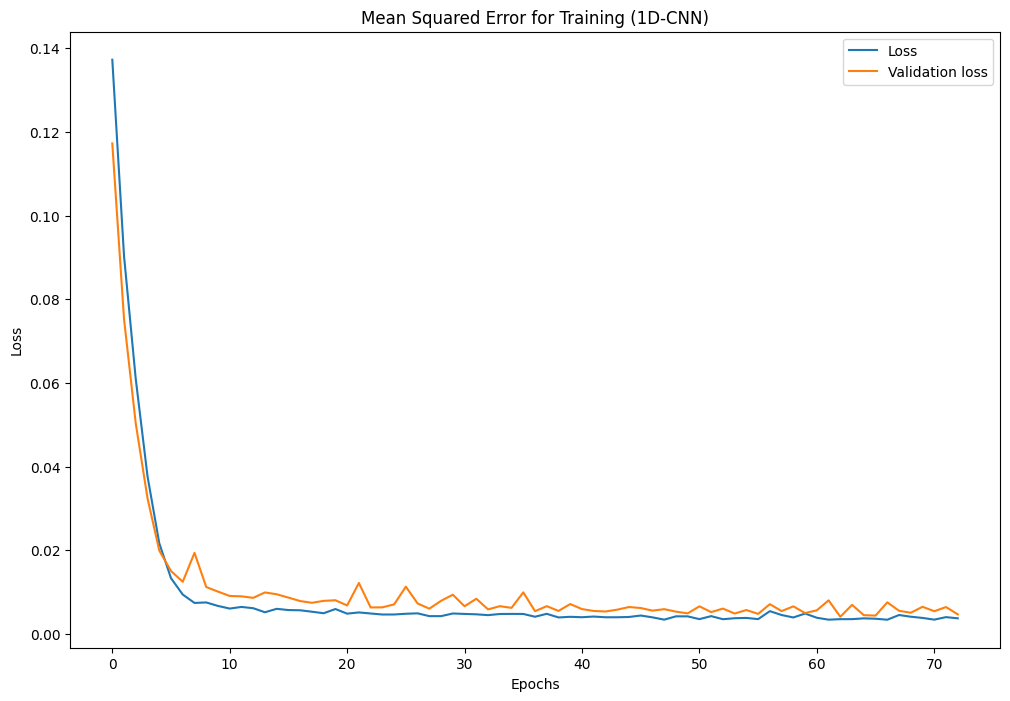

In [141]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (1D-CNN)")

In [142]:
cnn_model_dropout_regularizers.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 4ms/step - loss: 0.0041 - mean_squared_error: 0.0031 - mean_absolute_error: 0.0417 - root_mean_squared_error: 0.0556


[0.004079158417880535,
 0.003090799320489168,
 0.04166937991976738,
 0.05559495836496353]

In [143]:
# Now try to predict the training and test values.
training_predict = cnn_model_dropout_regularizers.predict(feature_training)
test_predict = cnn_model_dropout_regularizers.predict(feature_test)

12/12 [==============================] - 0s 2ms/step


In [144]:
# Restore the training and test datasets' original shapes.
training_result_cnn = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_cnn = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]      [1223.908203125]
31    2017-12-10  [1184.8400991863457]  [1225.2213134765625]
32    2017-12-11  [1224.1145485841962]  [1226.3306884765625]
33    2017-12-12  [1297.0276373650145]  [1228.6983642578125]
34    2017-12-13  [1324.4906040502817]   [1237.496826171875]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]   [2411.765869140625]
1600  2022-03-28  [2733.5177311196053]   [2429.614013671875]
1601  2022-03-29  [2768.4794493421177]     [2451.9482421875]
1602  2022-03-30  [2759.4760758914417]      [2476.150390625]
1603  2022-03-31   [2704.099092600401]   [2498.410888671875]

[1574 rows x 3 columns]


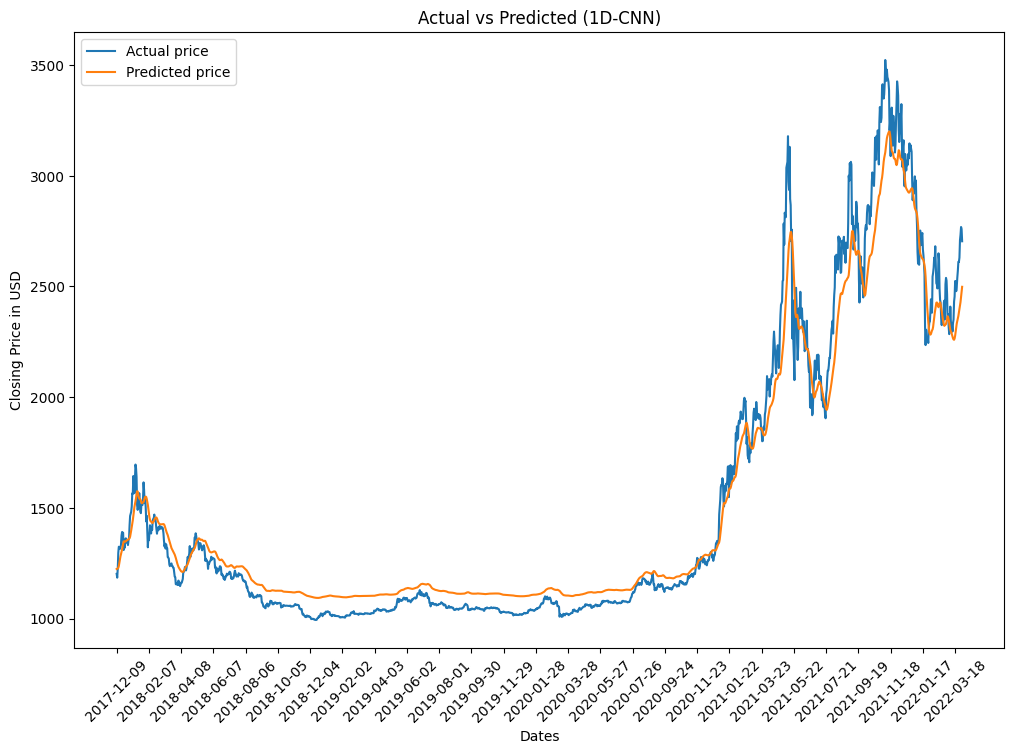

In [145]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_cnn, original_data, "Actual vs Predicted (1D-CNN)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]             [2783.75]
1635  2022-05-02           [2857.4104]   [2761.599365234375]
1636  2022-05-03         [2783.476318]    [2749.52294921875]
1637  2022-05-04         [2940.644775]    [2739.07958984375]
1638  2022-05-05         [2749.213135]    [2735.72900390625]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]  [1950.1878662109375]
1989  2023-04-21         [1849.999878]  [1943.4881591796875]
1990  2023-04-22  [1874.2286380000003]  [1930.3004150390625]
1991  2023-04-23         [1862.062012]  [1913.9830322265625]
1992  2023-04-24         [1833.186401]   [1899.571533203125]

[359 rows x 3 columns]


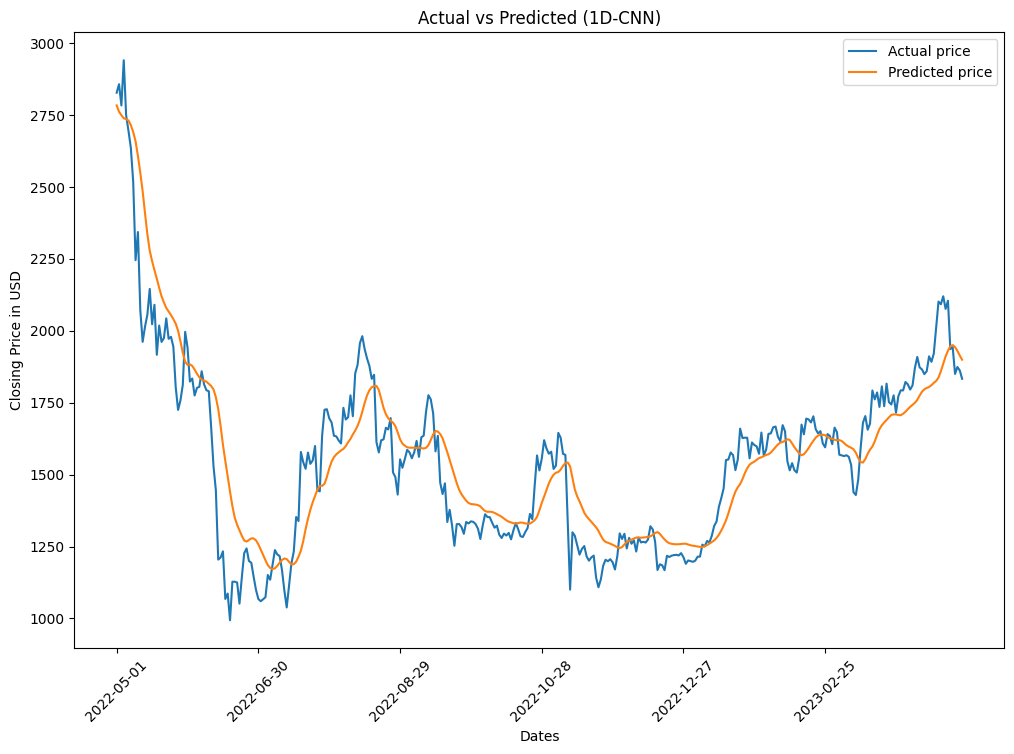

In [146]:
plot_result_test(label_test, test_result_cnn, label_training.shape[0], original_data, "Actual vs Predicted (1D-CNN)")

In [147]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## LSTM

In [148]:
lstm_model_dropout_regularizers = tf.models.Sequential()
lstm_model_dropout_regularizers.add(tf.layers.LSTM(units=128, activation='relu', kernel_regularizer="l1_l2", input_shape=(num_steps, 1), return_sequences=True))
lstm_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
lstm_model_dropout_regularizers.add(tf.layers.LSTM(units=128, return_sequences=True))
lstm_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
lstm_model_dropout_regularizers.add(tf.layers.LSTM(units=128, return_sequences=True))
lstm_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
lstm_model_dropout_regularizers.add(tf.layers.LSTM(units=128, return_sequences=True))
lstm_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
lstm_model_dropout_regularizers.add(tf.layers.LSTM(units=128))
lstm_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
lstm_model_dropout_regularizers.add(tf.layers.Dense(1))
lstm_model_dropout_regularizers.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                       metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])
lstm_model_dropout_regularizers.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 30, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 30, 128)           131584    
                                                                 
 dropout_2 (Dropout)         (None, 30, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 30, 128)           1

In [149]:
train_result = lstm_model_dropout_regularizers.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 14s 96ms/step - loss: 0.2130 - mean_squared_error: 0.0161 - mean_absolute_error: 0.0721 - root_mean_squared_error: 0.1268 - val_loss: 0.1137 - val_mean_squared_error: 0.0127 - val_mean_absolute_error: 0.0865 - val_root_mean_squared_error: 0.1125
Epoch 2/100
50/50 [==============================] - 5s 103ms/step - loss: 0.0539 - mean_squared_error: 0.0042 - mean_absolute_error: 0.0399 - root_mean_squared_error: 0.0645 - val_loss: 0.0247 - val_mean_squared_error: 0.0099 - val_mean_absolute_error: 0.0780 - val_root_mean_squared_error: 0.0993
Epoch 3/100
50/50 [==============================] - 3s 65ms/step - loss: 0.0144 - mean_squared_error: 0.0056 - mean_absolute_error: 0.0529 - root_mean_squared_error: 0.0751 - val_loss: 0.0205 - val_mean_squared_error: 0.0151 - val_mean_absolute_error: 0.0927 - val_root_mean_squared_error: 0.1227
Epoch 4/100
50/50 [==============================] - 3s 66ms/step - loss: 0.0101 - mean_squared_error: 0

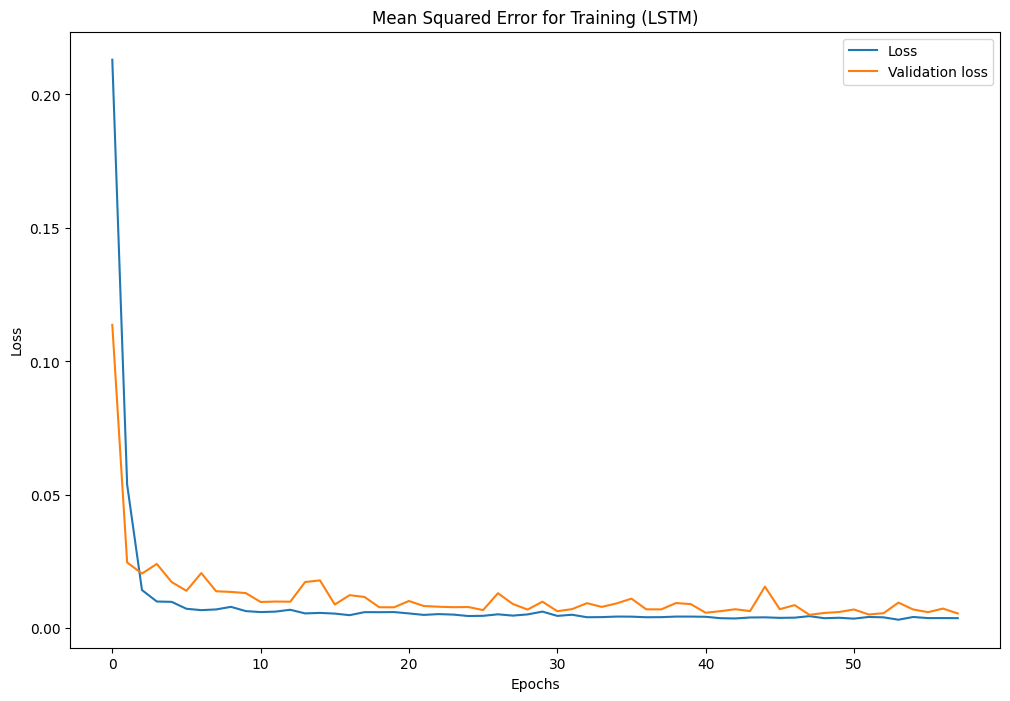

In [150]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (LSTM)")

In [151]:
lstm_model_dropout_regularizers.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 12ms/step - loss: 0.0051 - mean_squared_error: 0.0036 - mean_absolute_error: 0.0415 - root_mean_squared_error: 0.0596


[0.0050661261193454266,
 0.003550749272108078,
 0.041472915560007095,
 0.05958816409111023]

In [152]:
# Now try to predict the training and test values.
training_predict = lstm_model_dropout_regularizers.predict(feature_training)
test_predict = lstm_model_dropout_regularizers.predict(feature_test)

12/12 [==============================] - 0s 11ms/step


In [153]:
# Restore the training and test datasets' original shapes.
training_result_lstm = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_lstm = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]   [1178.899658203125]
31    2017-12-10  [1184.8400991863457]   [1176.774658203125]
32    2017-12-11  [1224.1145485841962]     [1175.0361328125]
33    2017-12-12  [1297.0276373650145]  [1174.4205322265625]
34    2017-12-13  [1324.4906040502817]     [1176.8583984375]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]    [2527.83544921875]
1600  2022-03-28  [2733.5177311196053]      [2544.787109375]
1601  2022-03-29  [2768.4794493421177]    [2562.25244140625]
1602  2022-03-30  [2759.4760758914417]   [2581.650634765625]
1603  2022-03-31   [2704.099092600401]   [2601.996337890625]

[1574 rows x 3 columns]


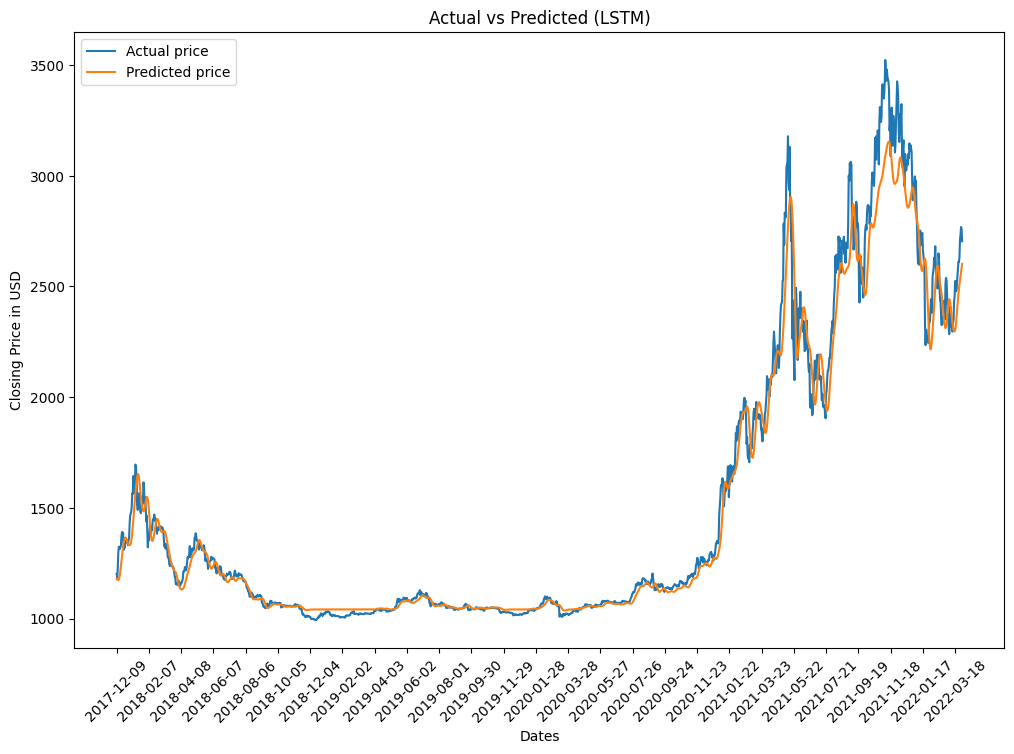

In [154]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_lstm, original_data, "Actual vs Predicted (LSTM)")

           Dates          Actual Price      Predicted Price
1634  2022-05-01         [2827.756104]   [2790.69189453125]
1635  2022-05-02           [2857.4104]       [2768.4140625]
1636  2022-05-03         [2783.476318]  [2747.498291015625]
1637  2022-05-04         [2940.644775]  [2729.160888671875]
1638  2022-05-05         [2749.213135]  [2717.003173828125]
...          ...                   ...                  ...
1988  2023-04-20         [1943.097656]  [2063.476806640625]
1989  2023-04-21         [1849.999878]  [2081.408447265625]
1990  2023-04-22  [1874.2286380000003]     [2083.650390625]
1991  2023-04-23         [1862.062012]        [2068.734375]
1992  2023-04-24         [1833.186401]       [2039.7109375]

[359 rows x 3 columns]


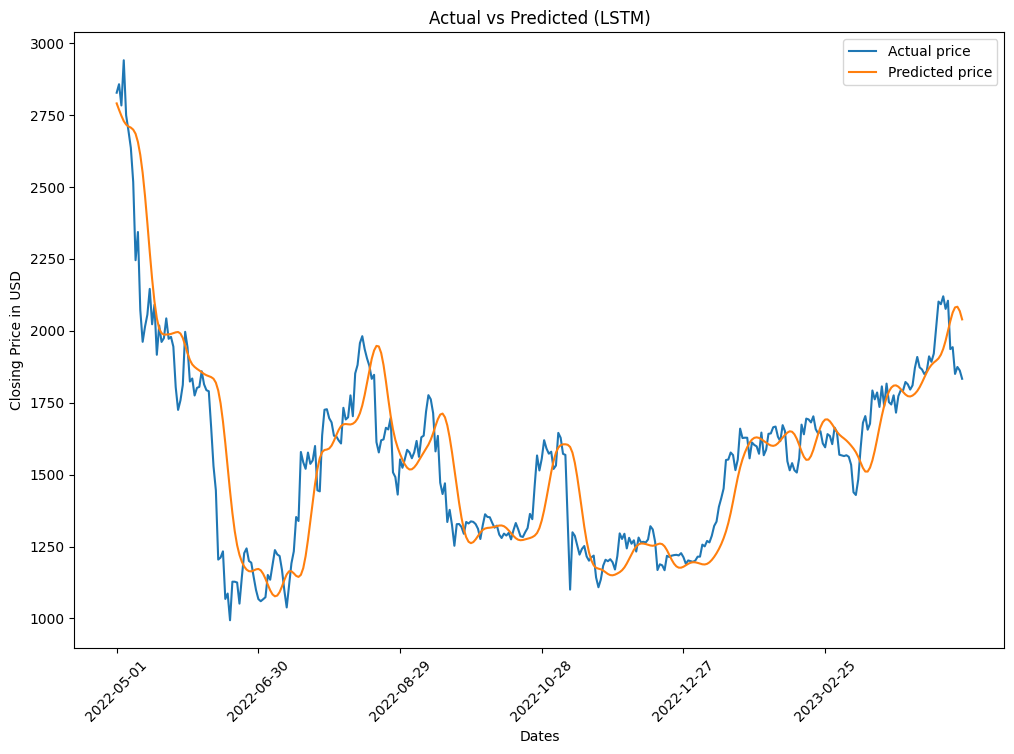

In [155]:
plot_result_test(label_test, test_result_lstm, label_training.shape[0], original_data, "Actual vs Predicted (LSTM)")

In [156]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## GRU

In [157]:
gru_model_dropout_regularizers = tf.models.Sequential()
gru_model_dropout_regularizers.add(tf.layers.GRU(units=128, activation='relu', kernel_regularizer="l1_l2", input_shape=(num_steps, 1), return_sequences=True))
gru_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
gru_model_dropout_regularizers.add(tf.layers.GRU(units=128, return_sequences=True))
gru_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
gru_model_dropout_regularizers.add(tf.layers.GRU(units=128, return_sequences=True))
gru_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
gru_model_dropout_regularizers.add(tf.layers.GRU(units=128, return_sequences=True))
gru_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
gru_model_dropout_regularizers.add(tf.layers.GRU(units=128))
gru_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
gru_model_dropout_regularizers.add(tf.layers.Dense(1))
gru_model_dropout_regularizers.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                       metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])
gru_model_dropout_regularizers.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 128)           50304     
                                                                 
 dropout (Dropout)           (None, 30, 128)           0         
                                                                 
 gru_1 (GRU)                 (None, 30, 128)           99072     
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 gru_2 (GRU)                 (None, 30, 128)           99072     
                                                                 
 dropout_2 (Dropout)         (None, 30, 128)           0         
                                                                 
 gru_3 (GRU)                 (None, 30, 128)           9

In [158]:
train_result = gru_model_dropout_regularizers.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 15s 103ms/step - loss: 0.1894 - mean_squared_error: 0.0101 - mean_absolute_error: 0.0562 - root_mean_squared_error: 0.1007 - val_loss: 0.1078 - val_mean_squared_error: 0.0056 - val_mean_absolute_error: 0.0544 - val_root_mean_squared_error: 0.0747
Epoch 2/100
50/50 [==============================] - 6s 117ms/step - loss: 0.0594 - mean_squared_error: 0.0027 - mean_absolute_error: 0.0357 - root_mean_squared_error: 0.0520 - val_loss: 0.0258 - val_mean_squared_error: 0.0042 - val_mean_absolute_error: 0.0479 - val_root_mean_squared_error: 0.0648
Epoch 3/100
50/50 [==============================] - 4s 80ms/step - loss: 0.0139 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0437 - root_mean_squared_error: 0.0625 - val_loss: 0.0119 - val_mean_squared_error: 0.0068 - val_mean_absolute_error: 0.0702 - val_root_mean_squared_error: 0.0822
Epoch 4/100
50/50 [==============================] - 6s 119ms/step - loss: 0.0075 - mean_squared_error:

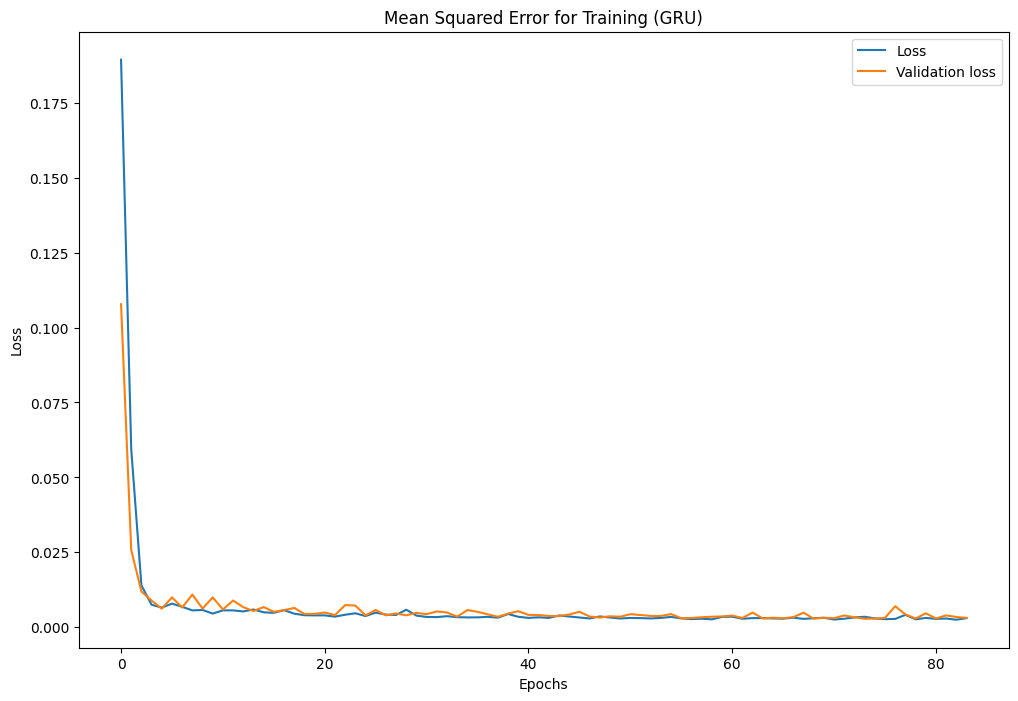

In [159]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (GRU)")

In [160]:
gru_model_dropout_regularizers.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 14ms/step - loss: 0.0028 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0272 - root_mean_squared_error: 0.0395


[0.002845560200512409,
 0.0015563159249722958,
 0.02721332013607025,
 0.03945017233490944]

In [161]:
# Now try to predict the training and test values.
training_predict = gru_model_dropout_regularizers.predict(feature_training)
test_predict = gru_model_dropout_regularizers.predict(feature_test)

12/12 [==============================] - 0s 11ms/step


In [162]:
# Restore the training and test datasets' original shapes.
training_result_gru = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_gru = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]     [1178.6767578125]
31    2017-12-10  [1184.8400991863457]   [1182.186279296875]
32    2017-12-11  [1224.1145485841962]   [1182.744873046875]
33    2017-12-12  [1297.0276373650145]     [1189.7060546875]
34    2017-12-13  [1324.4906040502817]  [1214.1580810546875]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]   [2568.524658203125]
1600  2022-03-28  [2733.5177311196053]   [2600.048095703125]
1601  2022-03-29  [2768.4794493421177]    [2636.18310546875]
1602  2022-03-30  [2759.4760758914417]   [2672.330810546875]
1603  2022-03-31   [2704.099092600401]     [2699.9169921875]

[1574 rows x 3 columns]


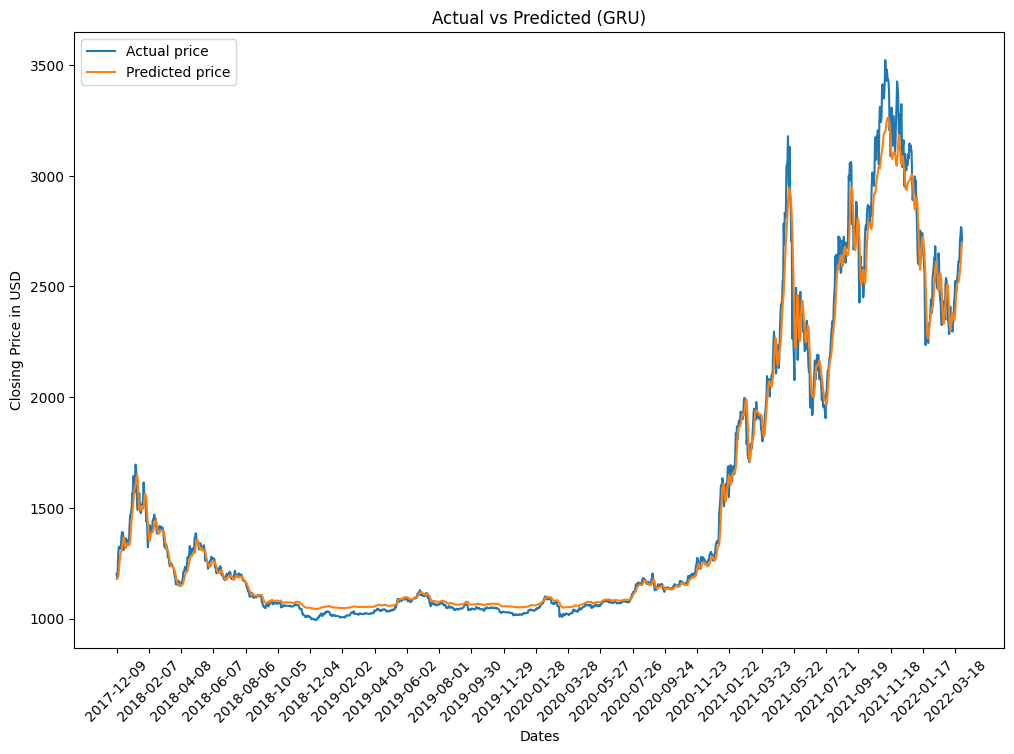

In [163]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_gru, original_data, "Actual vs Predicted (GRU)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]   [2803.425537109375]
1635  2022-05-02           [2857.4104]     [2780.9208984375]
1636  2022-05-03         [2783.476318]   [2770.281005859375]
1637  2022-05-04         [2940.644775]      [2765.001953125]
1638  2022-05-05         [2749.213135]    [2779.75244140625]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]   [2085.145263671875]
1989  2023-04-21         [1849.999878]    [2025.71142578125]
1990  2023-04-22  [1874.2286380000003]  [1950.7391357421875]
1991  2023-04-23         [1862.062012]  [1885.9051513671875]
1992  2023-04-24         [1833.186401]    [1847.69580078125]

[359 rows x 3 columns]


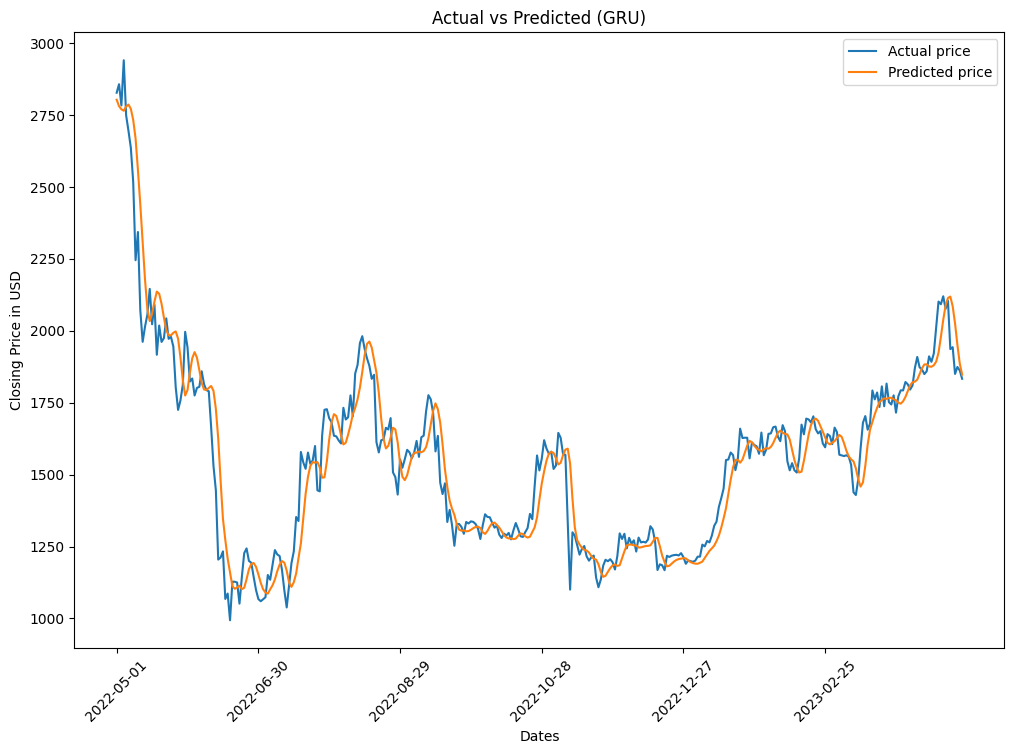

In [164]:
plot_result_test(label_test, test_result_gru, label_training.shape[0], original_data, "Actual vs Predicted (GRU)")

In [165]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.